In [2]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import   seasonal_decompose
from IPython.display import display
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
def parse(x):
    return datetime.strptime(x, '%Y-%m')

In [4]:
rose=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/rose.csv',index_col=0,parse_dates=True,date_parser=parse)

In [5]:
rose.head()

Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [6]:
rose.tail(15)

Rose
YearMonth       
1994-05-01  44.0
1994-06-01  45.0
1994-07-01   NaN
1994-08-01   NaN
1994-09-01  46.0
1994-10-01  51.0
1994-11-01  63.0
1994-12-01  84.0
1995-01-01  30.0
1995-02-01  39.0
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0

In [7]:
rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [8]:
rose.shape

(187, 1)

In [9]:
rose.isna().sum()

Rose    2
dtype: int64

In [10]:
rose.rename(columns={'Rose':'Sales'},inplace=True)

In [11]:
rose.fillna(rose.Sales.mean(),inplace=True)

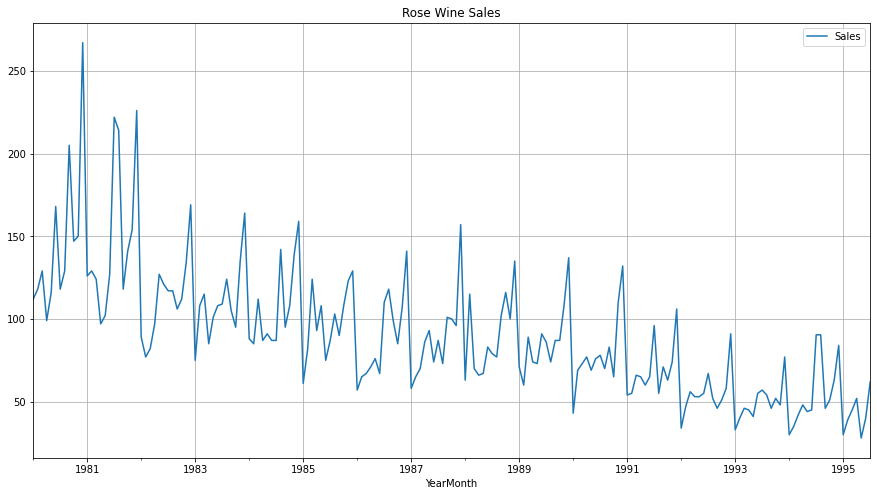

In [12]:
plt.rcParams['figure.figsize'] = 15,8
rose.plot()
plt.title('Rose Wine Sales')
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot YoY Wine Sales')

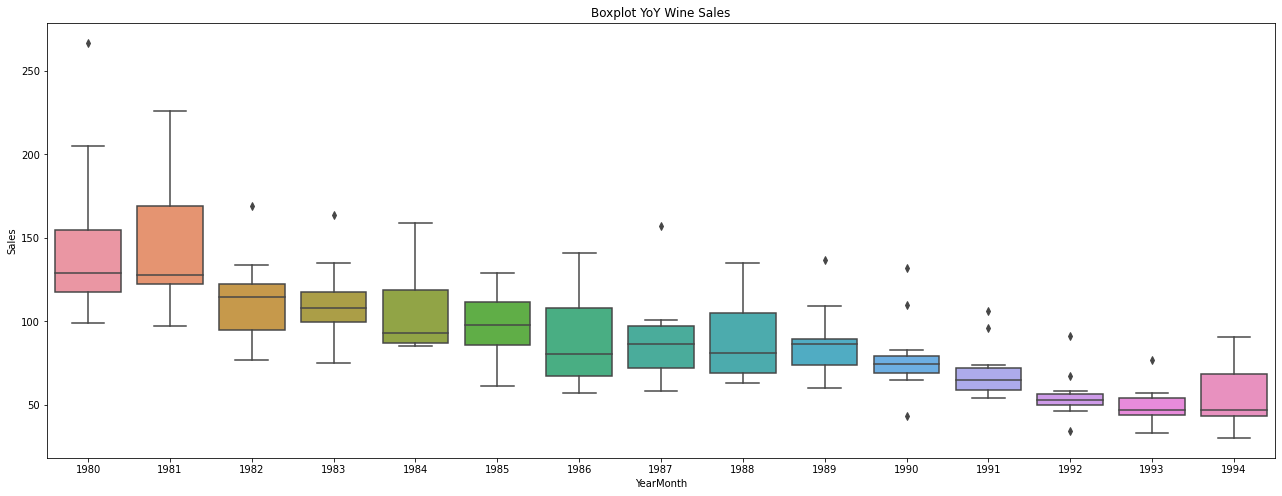

In [13]:
plt.figure(figsize=(22,8))
data=rose[rose.index.year<1995]
sns.boxplot(data.index.year,data.Sales)
plt.title('Boxplot YoY Wine Sales')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Boxplot Monthly Wine Sales')

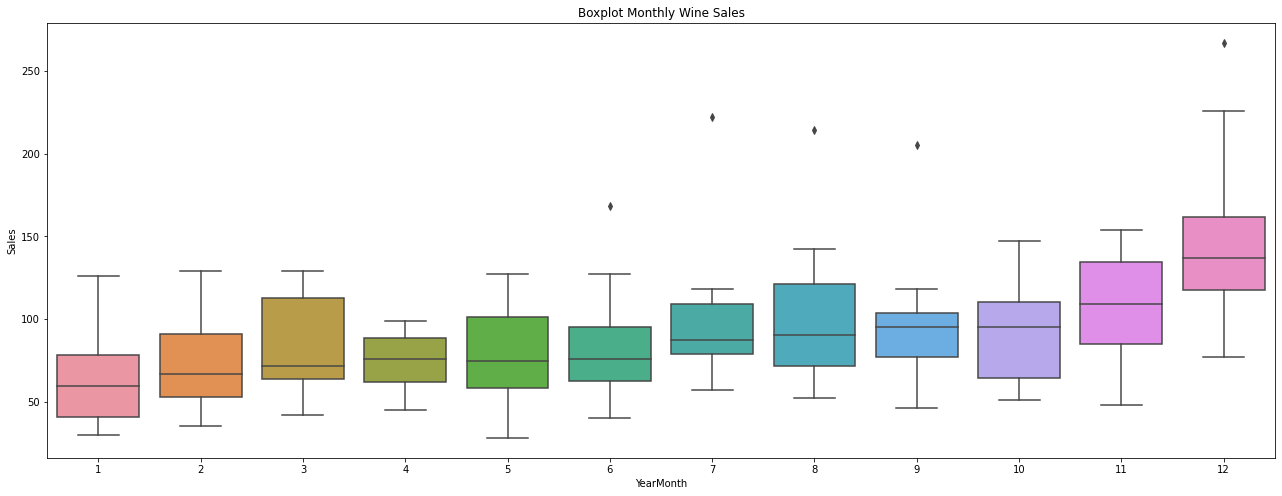

In [14]:
plt.figure(figsize=(22,8))
sns.boxplot(rose.index.month,rose.Sales)
plt.title('Boxplot Monthly Wine Sales')

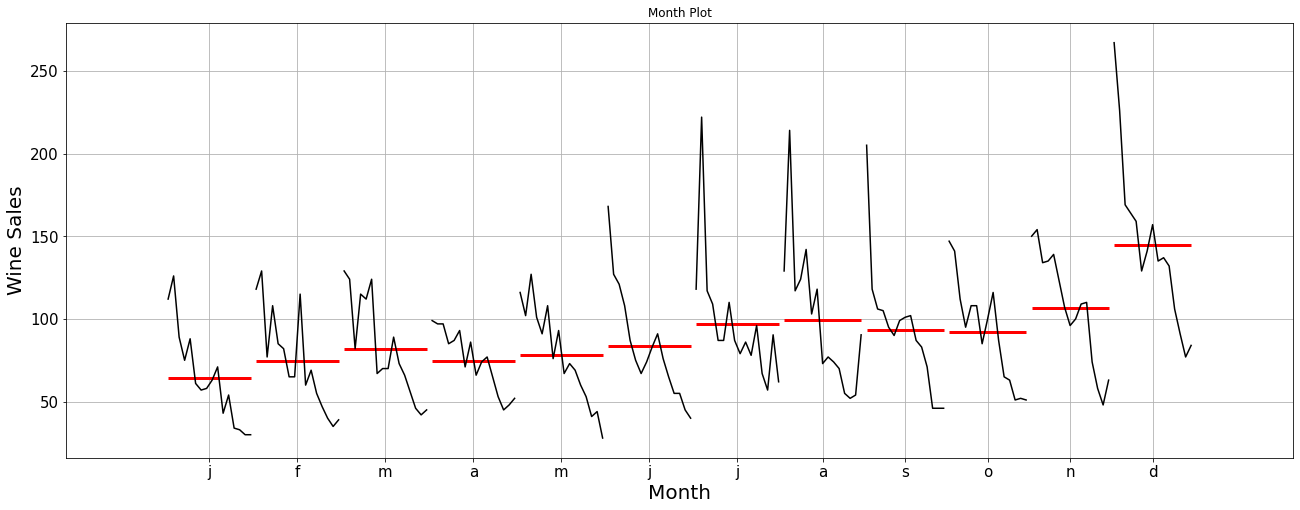

In [15]:
fig, ax = plt.subplots(figsize=(22,8))
month_plot(rose.Sales,ax=ax)
plt. ylabel('Wine Sales', fontsize=20)
plt. xlabel('Month', fontsize=20)
plt. xticks( fontsize=15)
plt. yticks( fontsize=15)
plt.title('Month Plot')
plt.grid();

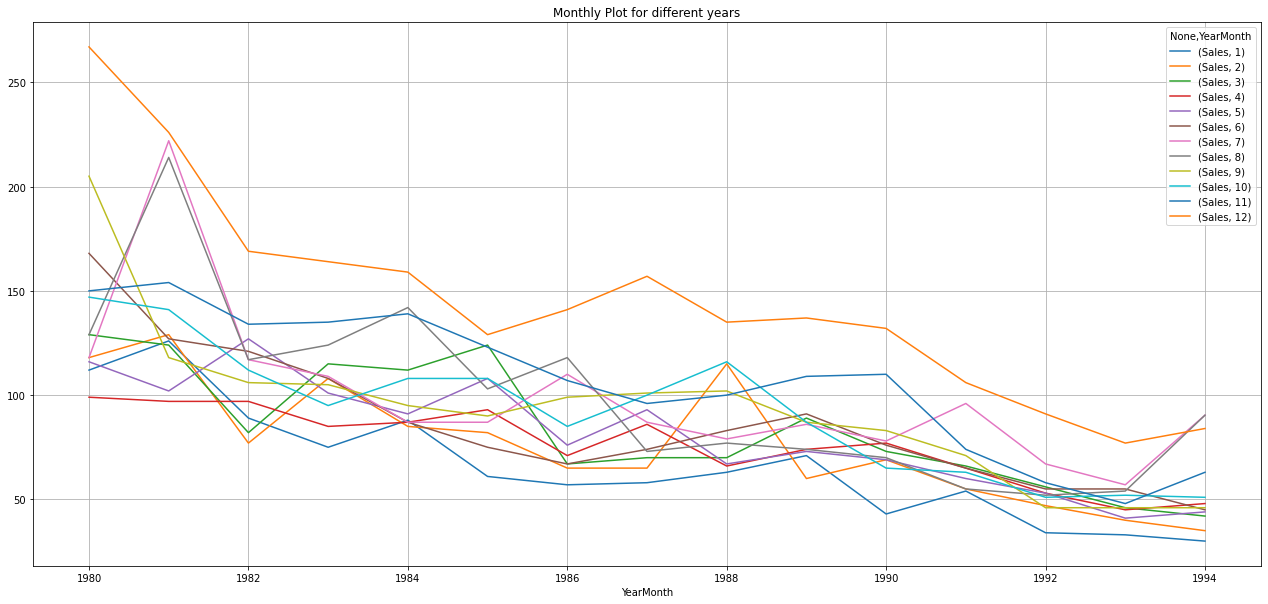

In [16]:
fig, ax = plt.subplots(figsize=(22,10))
y_sales_month=pd.pivot_table(data,values=data,index=data.index.year,columns=data.index.month)
y_sales_month.plot(ax=ax)
plt.title('Monthly Plot for different years')
plt.grid();

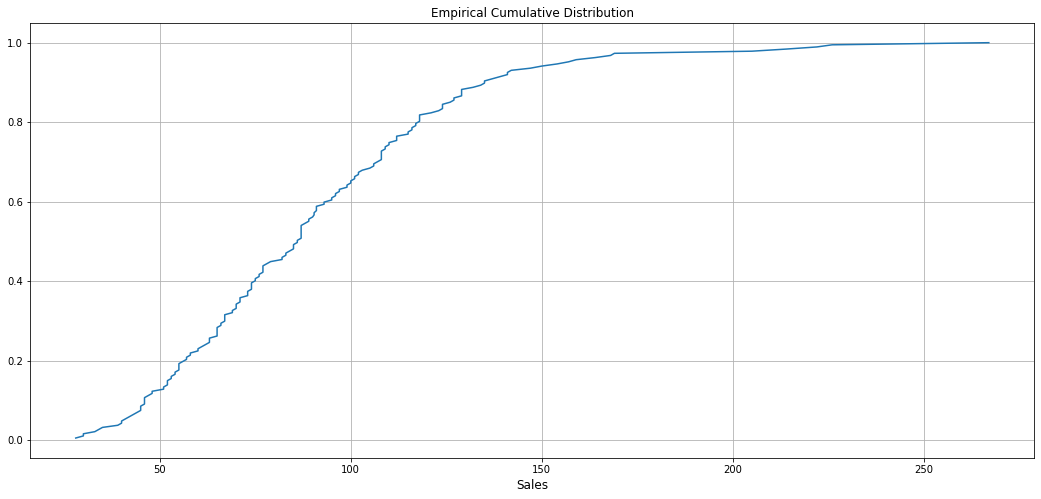

In [17]:
plt.figure(figsize = (18, 8))
cdf = ECDF(rose['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.title('Empirical Cumulative Distribution')

plt.xlabel('Sales',fontsize=12);

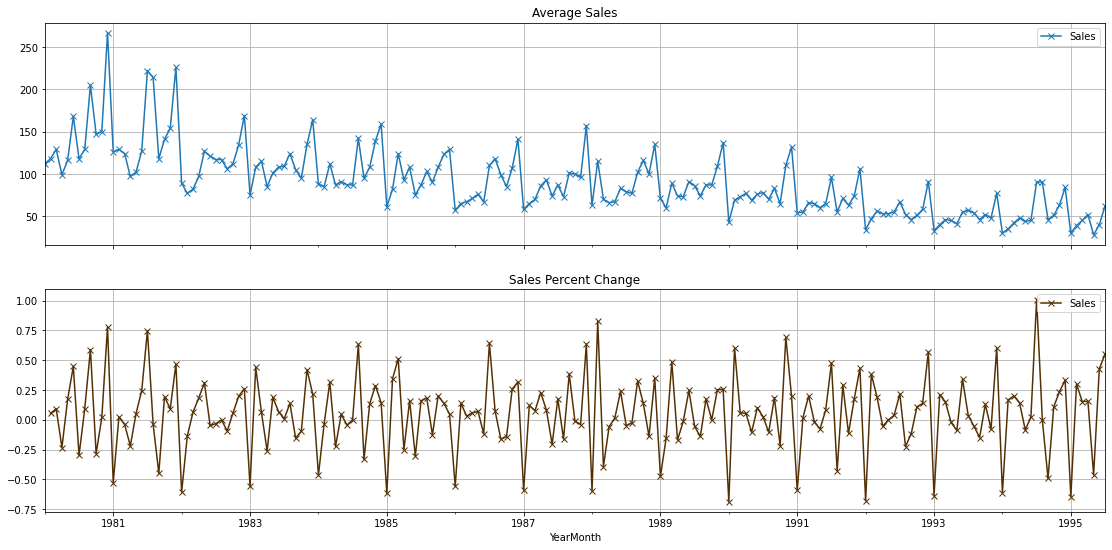

In [18]:
avg    = rose.groupby(rose.index)["Sales"].mean()
pct_change = rose.groupby(rose.index)["Sales"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(19,9))

# plot average Sales over time(year-month)
ax1 = avg.plot(legend=True,ax=axis1,marker='x',title="Average Sales",grid=True)
ax1.set_xticks(range(len(avg)))
ax1.set_xticklabels(avg.index.tolist())
# plot precent change for Sales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="BrBG",title="Sales Percent Change",grid=True)

In [19]:
rose_yearly=rose[rose.index.year<1996].resample('A').sum()
rose_yearly.head()

Sales
YearMonth         
1980-12-31  1758.0
1981-12-31  1780.0
1982-12-31  1348.0
1983-12-31  1324.0
1984-12-31  1280.0

Text(0.5, 1.0, 'Sum of Sales each year')

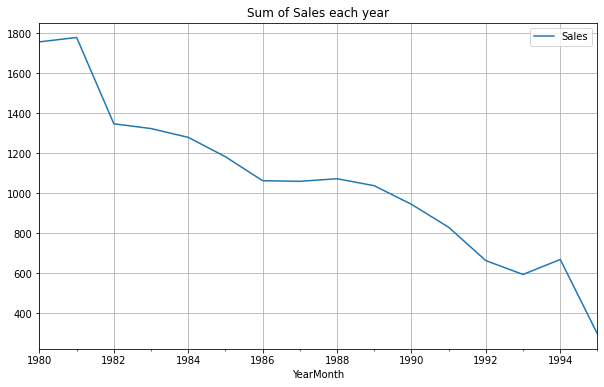

In [20]:
plt.rcParams['figure.figsize'] = 10,6
rose_yearly.plot()
plt.grid()
plt.title('Sum of Sales each year')

Text(0.5, 1.0, 'Average Sales each year')

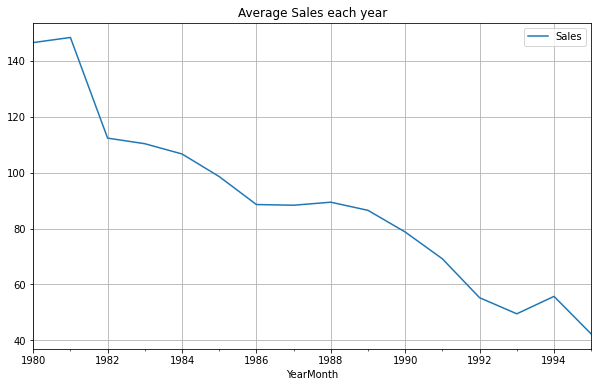

In [21]:
rose_yearly_avg=rose[rose.index.year<1996].resample('A').mean()
rose_yearly_avg.plot()
plt.grid()
plt.title('Average Sales each year')

Text(0.5, 1.0, 'Sum of Sales each quarter')

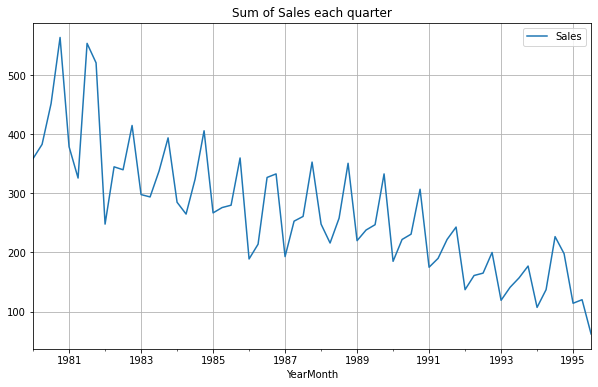

In [22]:
rose_quarterly=rose[rose.index.year<1996].resample('Q').sum()
rose_quarterly.plot()
plt.grid()
plt.title('Sum of Sales each quarter')

Text(0.5, 1.0, 'Avg Sales each quarter')

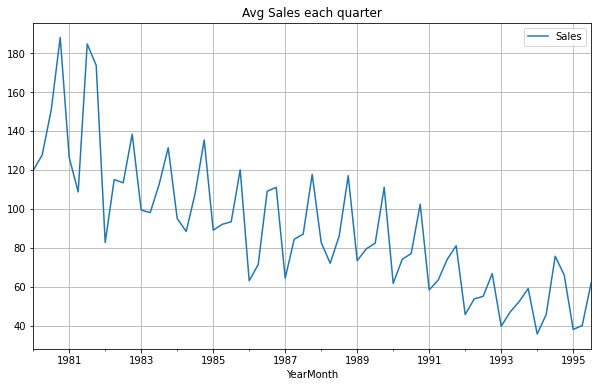

In [23]:
rose_quarterly_avg=rose[rose.index.year<1996].resample('Q').mean()
rose_quarterly_avg.plot()
plt.grid()
plt.title('Avg Sales each quarter')

In [24]:
quarter=['Q1','Q2','Q3','Q4']
rose_quarterly=rose[rose.index.year<1995].resample('Q').sum()
rose_quarterly['Quarter']=quarter*15
rose_quarterly

Sales Quarter
YearMonth                     
1980-03-31  359.000000      Q1
1980-06-30  383.000000      Q2
1980-09-30  452.000000      Q3
1980-12-31  564.000000      Q4
1981-03-31  379.000000      Q1
1981-06-30  326.000000      Q2
1981-09-30  554.000000      Q3
1981-12-31  521.000000      Q4
1982-03-31  248.000000      Q1
1982-06-30  345.000000      Q2
1982-09-30  340.000000      Q3
1982-12-31  415.000000      Q4
1983-03-31  298.000000      Q1
1983-06-30  294.000000      Q2
1983-09-30  338.000000      Q3
1983-12-31  394.000000      Q4
1984-03-31  285.000000      Q1
1984-06-30  265.000000      Q2
1984-09-30  324.000000      Q3
1984-12-31  406.000000      Q4
1985-03-31  267.000000      Q1
1985-06-30  276.000000      Q2
1985-09-30  280.000000      Q3
1985-12-31  360.000000      Q4
1986-03-31  189.000000      Q1
1986-06-30  214.000000      Q2
1986-09-30  327.000000      Q3
1986-12-31  333.000000      Q4
1987-03-31  193.000000      Q1
1987-06-30  253.000000      Q2
1987-09-30  261.000000      Q3
1987-12-31  353.000000      Q4
1988-03-31  248.000000      Q1
1988-06-30  216.000000      Q2
1988-09-30  258.000000      Q3
1988-12-31  351.000000      Q4
1989-03-31  220.000000      Q1
1989-06-30  238.000000      Q2
1989-09-30  247.000000      Q3
1989-12-31  333.000000      Q4
1990-03-31  185.000000      Q1
1990-06-30  222.000000      Q2
1990-09-30  231.000000      Q3
1990-12-31  307.000000      Q4
1991-03-31  175.000000      Q1
1991-06-30  190.000000      Q2
1991-09-30  222.000000      Q3
1991-12-31  243.000000      Q4
1992-03-31  137.000000      Q1
1992-06-30  161.000000      Q2
1992-09-30  165.000000      Q3
1992-12-31  200.000000      Q4
1993-03-31  119.000000      Q1
1993-06-30  141.000000      Q2
1993-09-30  157.000000      Q3
1993-12-31  177.000000      Q4
1994-03-31  107.000000      Q1
1994-06-30  137.000000      Q2
1994-09-30  226.789189      Q3
1994-12-31  198.000000      Q4

In [25]:
quarterly_turnover = pd.pivot_table(rose_quarterly, values = "Sales", columns = "Quarter", index = rose_quarterly.index.year)
quarterly_turnover

Quarter       Q1     Q2          Q3     Q4
YearMonth                                 
1980       359.0  383.0  452.000000  564.0
1981       379.0  326.0  554.000000  521.0
1982       248.0  345.0  340.000000  415.0
1983       298.0  294.0  338.000000  394.0
1984       285.0  265.0  324.000000  406.0
1985       267.0  276.0  280.000000  360.0
1986       189.0  214.0  327.000000  333.0
1987       193.0  253.0  261.000000  353.0
1988       248.0  216.0  258.000000  351.0
1989       220.0  238.0  247.000000  333.0
1990       185.0  222.0  231.000000  307.0
1991       175.0  190.0  222.000000  243.0
1992       137.0  161.0  165.000000  200.0
1993       119.0  141.0  157.000000  177.0
1994       107.0  137.0  226.789189  198.0

Text(0, 0.5, 'Total Sales')

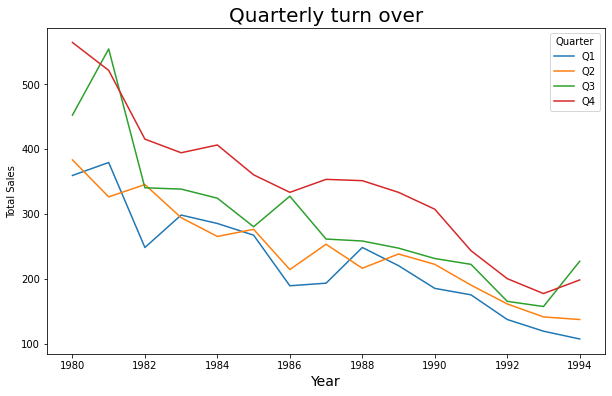

In [26]:
quarterly_turnover.plot()
plt.title('Quarterly turn over',fontsize=20)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Total Sales')

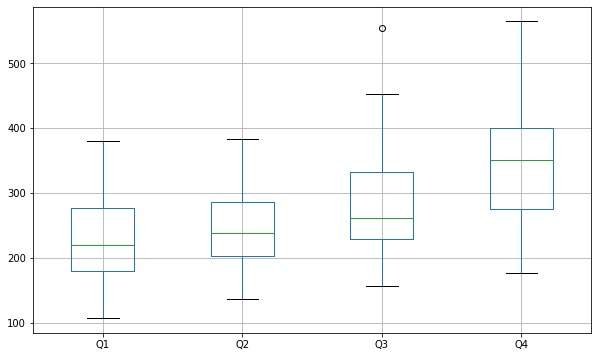

In [27]:
quarterly_turnover.boxplot()

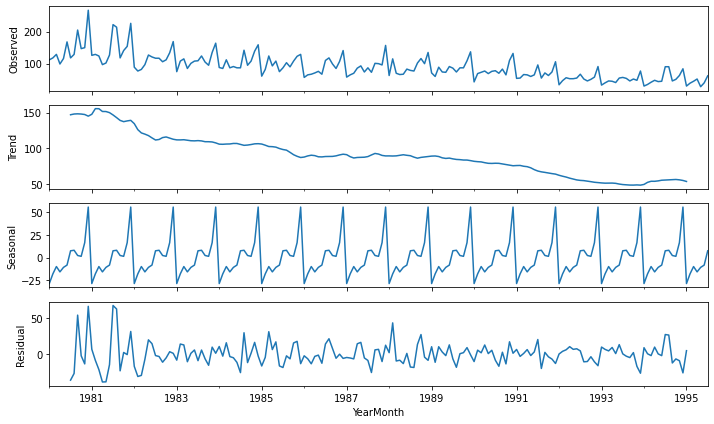

In [28]:
decomposition=seasonal_decompose(rose['Sales'].dropna(),model='additive',freq=12)
decomposition.plot();


In [29]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: Sales, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.403723
1980-02-01   -17.833219
1980-03-01    -9.816537
1980-04-01   -15.629037
1980-05-01   -10.727251
1980-06-01    -8.209394
1980-07-01     7.405916
1980-08-01     7.986472
1980-09-01     2.279610
1980-10-01     1.376832
1980-11-01    16.351832
1980-12-01    55.218499
Name: Sales, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.489250
1980-08-01   -27.111472
1980-09-01    54.345390
1980-10-01    -2.460165
1980-11-01   -13.768499
1980-12-01    66.656501
N

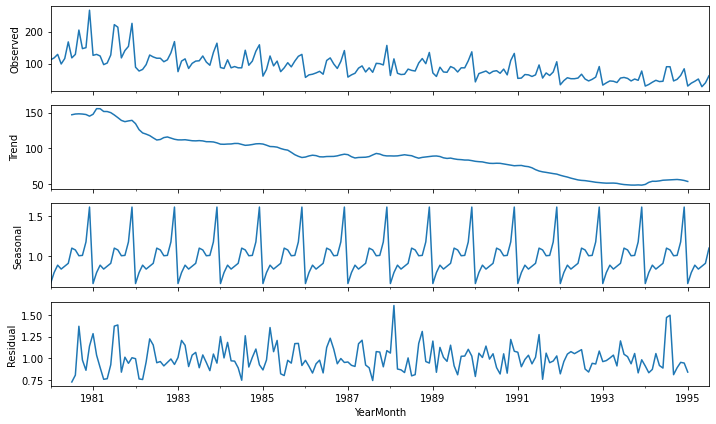

In [30]:
decomposition=seasonal_decompose(rose['Sales'].dropna(),model='multiplicative',freq=12)
decomposition.plot();

In [31]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: Sales, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.664388
1980-02-01    0.800694
1980-03-01    0.892495
1980-04-01    0.844044
1980-05-01    0.880516
1980-06-01    0.915220
1980-07-01    1.103899
1980-08-01    1.081169
1980-09-01    1.009574
1980-10-01    1.013692
1980-11-01    1.181135
1980-12-01    1.613174
Name: Sales, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    0.726757
1980-08-01    0.805504
1980-09-01    1.368532
1980-10-01    0.979276
1980-11-01    0.861480
1980-12-01    1.140480
Name: Sales, dtype: float

## 3. Split the data into training and test. The test data should start in 1991.

In [32]:
train=rose[rose.index.year<1991]
test=rose[rose.index.year>1990]

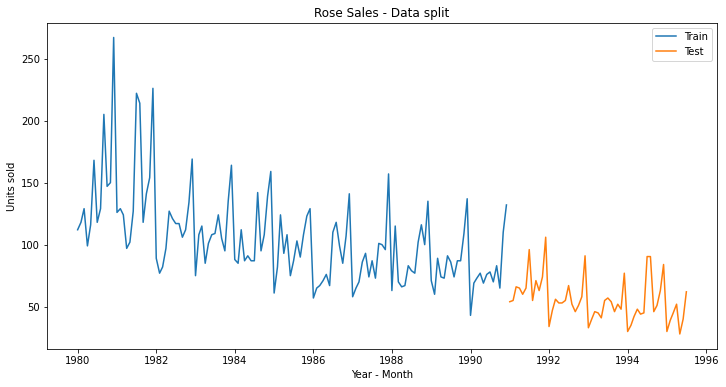

In [33]:
plt.figure(figsize = (12, 6))
plt.plot(train['Sales'], label = 'Train')
plt.plot(test['Sales'], label = 'Test')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

In [34]:
## Mean Absolute Percentage Error 
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape



In [35]:
def calc_metrics(y,yhat):
    rmse=metrics.mean_squared_error(y,yhat,squared=False)
    mape=MAPE(y,yhat)
    return rmse,mape

In [36]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Sales
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Sales
YearMonth        
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0
1991-04-01   65.0
1991-05-01   60.0

Last few rows of Test Data


Sales
YearMonth        
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

## Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

## Model 1: Linear Regression

In [37]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]

In [38]:
lr_train=pd.DataFrame(train.copy())
lr_test=pd.DataFrame(test.copy())

In [39]:
lr_train['Time']=train_time
lr_test['Time']=test_time

In [40]:
lr=LinearRegression()
lr.fit(np.array(lr_train['Time']).reshape(-1,1),lr_train['Sales'])

LinearRegression()

In [41]:
lr_train['Predict']=lr.predict(np.array(lr_train['Time']).reshape(-1,1))
lr_test['Predict']=lr.predict(np.array(lr_test['Time']).reshape(-1,1))

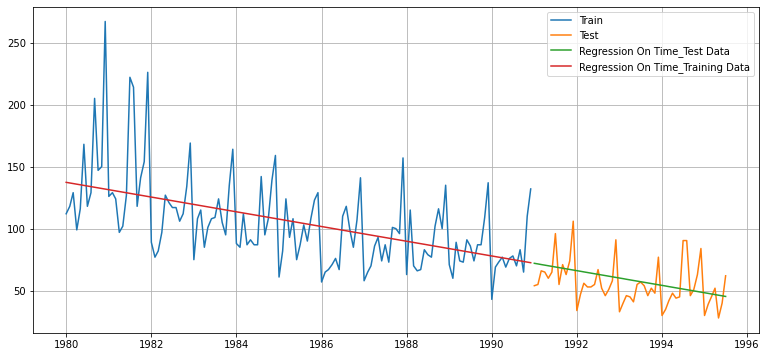

In [42]:
plt.figure(figsize=(13,6))
plt.plot( lr_train['Sales'], label='Train')
plt.plot(lr_test['Sales'], label='Test')
plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [43]:
rmse,mape=calc_metrics(lr_train['Sales'],lr_train['Predict'])
resultsDf = pd.DataFrame({'Test RMSE': [rmse],'Test MAPE': [mape]},index=['RegressionOnTime'])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime  30.718135      21.22

## Method 2: Regression on Time With Seasonal Components

In [44]:
lr_mon_seasonality_train=pd.DataFrame(train.copy())
lr_mon_seasonality_test=pd.DataFrame(test.copy())
lr_mon_seasonality_train['Time']=train_time
lr_mon_seasonality_test['Time']=test_time

In [45]:
month_seasonality='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12'.split()
mon='m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7 m8 m9 m10 m11 m12 m1 m2 m3 m4 m5 m6 m7'
lr_mon_seasonality_train['MonthSeasonality']=month_seasonality*11
lr_mon_seasonality_test['MonthSeasonality']=mon.split()

In [46]:
lr_mon_seasonality_train=pd.get_dummies(lr_mon_seasonality_train,drop_first=True)
lr_mon_seasonality_test=pd.get_dummies(lr_mon_seasonality_test,drop_first=True)

In [47]:
x_train=lr_mon_seasonality_train.drop('Sales',axis=1)
y_train=lr_mon_seasonality_train.Sales
x_test=lr_mon_seasonality_test.drop('Sales',axis=1)
y_test=lr_mon_seasonality_test.Sales

lr_seas_model= LinearRegression()
lr_seas_model.fit(x_train, y_train)

LinearRegression()

In [48]:
lr_mon_seasonality_train['Predict']=lr_seas_model.predict(x_train)
lr_mon_seasonality_test['Predict']=lr_seas_model.predict(x_test)

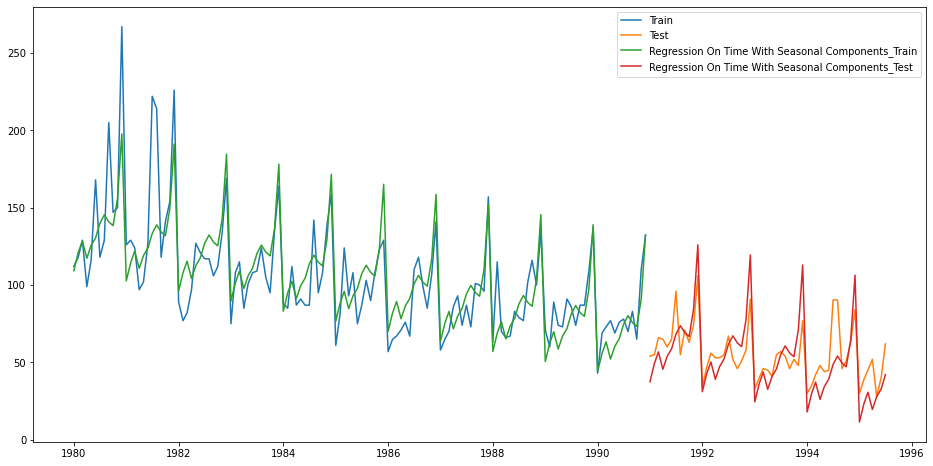

In [49]:
plt.figure(figsize=(16,8))
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.legend(loc='best')

In [50]:
rmse,mape=calc_metrics(lr_mon_seasonality_test['Sales'],lr_mon_seasonality_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['RegressionOnTimeSeasonal'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89

## Method 3 : Naive Approach: ŷ t+1=y

In [51]:
naive_test=pd.DataFrame(test.copy())


In [52]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()
NaiveModel_test['naive'] = np.asarray(train['Sales'])[len(np.asarray(train['Sales']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

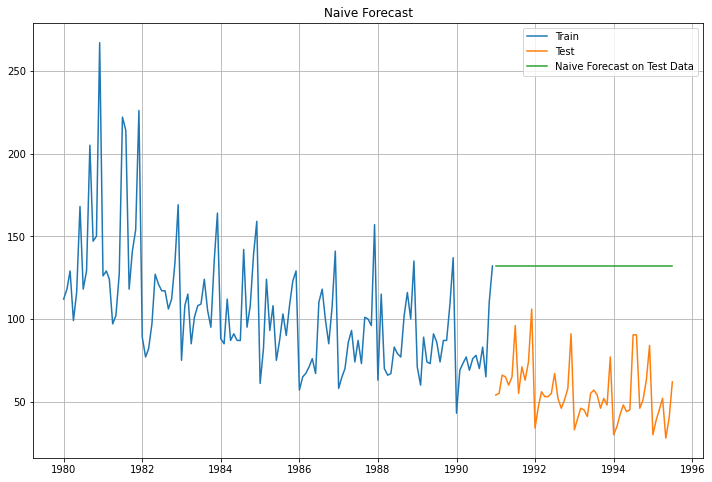

In [53]:
plt.figure(figsize=(12,8))
plt.plot(NaiveModel_train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [54]:
rmse,mape=calc_metrics(NaiveModel_test['Sales'] ,NaiveModel_test['naive'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Naive'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89

## Method 4 : Simple Average

In [55]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [56]:
SimpleAverage_test['mean_forecast'] = train['Sales'].mean()
SimpleAverage_test.head()

Sales  mean_forecast
YearMonth                       
1991-01-01   54.0     104.939394
1991-02-01   55.0     104.939394
1991-03-01   66.0     104.939394
1991-04-01   65.0     104.939394
1991-05-01   60.0     104.939394

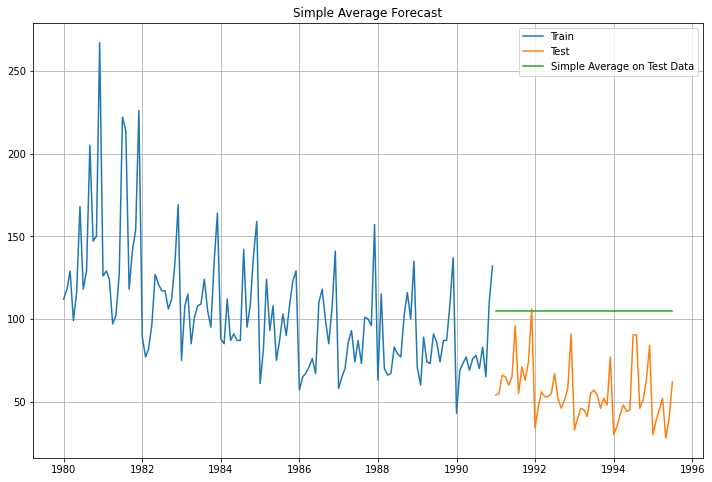

In [57]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sales'], label='Train')
plt.plot(SimpleAverage_test['Sales'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [58]:
rmse,mape=calc_metrics(test['Sales'],SimpleAverage_test['mean_forecast'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SimpleAvg'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19

## Method 4: Moving Average(MA)

In [59]:
MovingAverage = rose.copy()
MovingAverage.head()

Sales
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

In [60]:
MovingAverage['Trailing_2'] = MovingAverage['Sales'].rolling(2).mean()
MovingAverage['Trailing_3'] = MovingAverage['Sales'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sales'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sales'].rolling(9).mean()

MovingAverage.tail()

Sales  Trailing_2  Trailing_3  Trailing_6  Trailing_9
YearMonth                                                        
1995-03-01   45.0        42.0       49.50   52.000000   59.865465
1995-04-01   52.0        48.5       41.50   52.166667   55.599399
1995-05-01   28.0        40.0       41.00   46.333333   48.666667
1995-06-01   40.0        34.0       41.25   39.000000   48.000000
1995-07-01   62.0        51.0       45.50   44.333333   49.222222

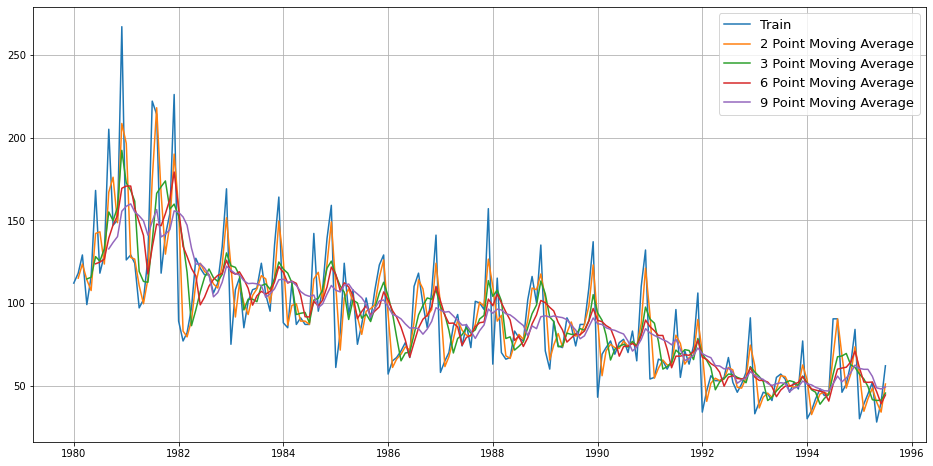

In [61]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sales'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_3'], label='3 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best',fontsize=13)
plt.grid();

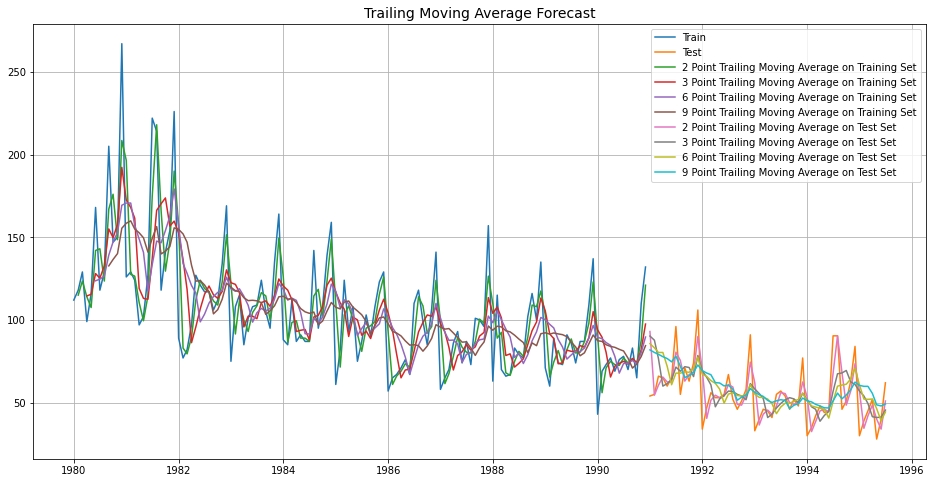

In [62]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year<1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>1990]

## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sales'], label='Train')
plt.plot(trailing_MovingAverage_test['Sales'], label='Test')

plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_3'], label='3 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')

plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_3'], label='3 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.title('Trailing Moving Average Forecast',fontsize=14)
plt.legend(loc = 'best')
plt.grid();

In [63]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_2'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_2'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19
Trailing_MA_2             12.298291      14.59

In [64]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_3'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_3'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19
Trailing_MA_2             12.298291      14.59
Trailing_MA_3             15.845558      21.55

In [65]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_6'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_6'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19
Trailing_MA_2             12.298291      14.59
Trailing_MA_3             15.845558      21.55
Trailing_MA_6             15.986163      22.40

In [66]:
rmse,mape=calc_metrics(trailing_MovingAverage_test['Sales'],trailing_MovingAverage_test['Trailing_9'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Trailing_MA_9'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19
Trailing_MA_2             12.298291      14.59
Trailing_MA_3             15.845558      21.55
Trailing_MA_6             15.986163      22.40
Trailing_MA_9             16.500823      23.18

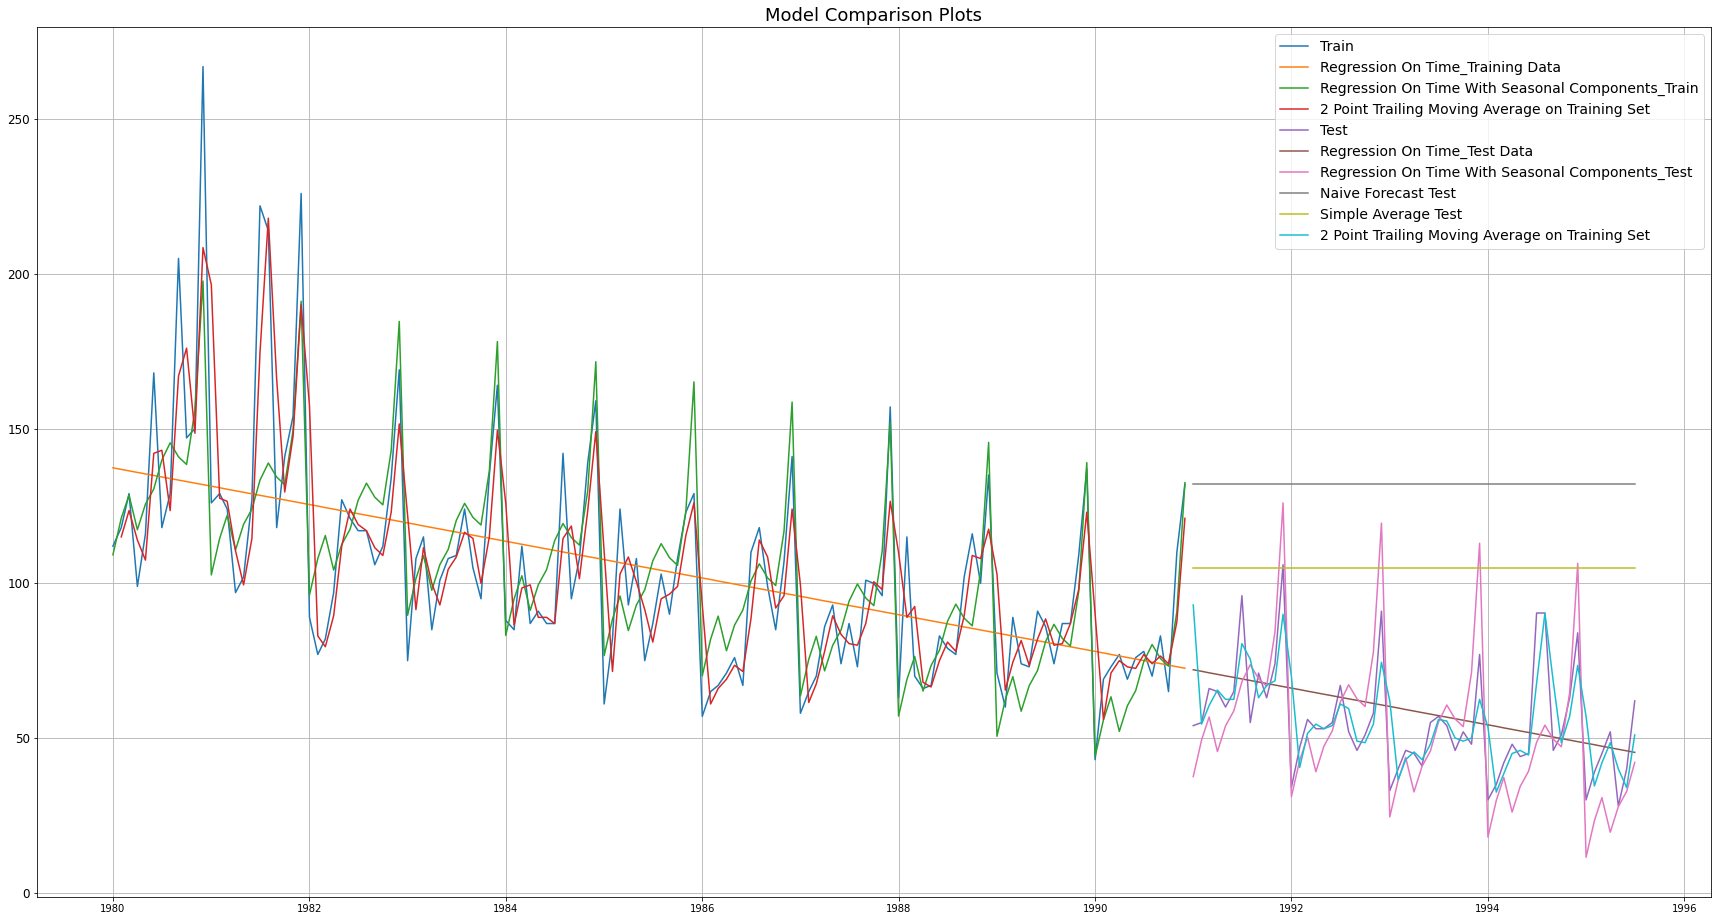

In [67]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,16))
plt.plot(train, label='Train')


plt.plot(lr_train['Predict'], label='Regression On Time_Training Data')
plt.plot(lr_mon_seasonality_train['Predict'], label='Regression On Time With Seasonal Components_Train')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.plot(test, label='Test')

plt.plot(lr_test['Predict'], label='Regression On Time_Test Data')
plt.plot(lr_mon_seasonality_test['Predict'], label='Regression On Time With Seasonal Components_Test')
plt.plot(naive_test.index,NaiveModel_test['naive'], label='Naive Forecast Test')
plt.plot(SimpleAverage_test.index,SimpleAverage_test['mean_forecast'], label='Simple Average Test')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')

plt.legend(loc='best',fontsize=14)
plt.title("Model Comparison Plots",fontsize=18)
plt.yticks(fontsize=12)
plt.grid();

## Simple Exponential Smoothing

In [68]:
SES_train = pd.DataFrame(train.copy())
SES_test = pd.DataFrame(test.copy())

In [69]:
model_SES = SimpleExpSmoothing(SES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [70]:
model_SES_autofit = model_SES.fit(optimized=True,use_brute=True)

In [71]:
model_SES_autofit.params

{'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09875003987520162,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [72]:
SES_train['Predict'] = model_SES_autofit.fittedvalues
SES_train.head()

Sales     Predict
YearMonth                    
1980-01-01  112.0  134.387120
1980-02-01  118.0  132.176391
1980-03-01  129.0  130.776472
1980-04-01   99.0  130.601045
1980-05-01  116.0  127.480441

In [73]:
SES_test['Predict'] = model_SES_autofit.forecast(steps=55)
SES_test.head()

Sales    Predict
YearMonth                   
1991-01-01   54.0  87.105003
1991-02-01   55.0  87.105003
1991-03-01   66.0  87.105003
1991-04-01   65.0  87.105003
1991-05-01   60.0  87.105003

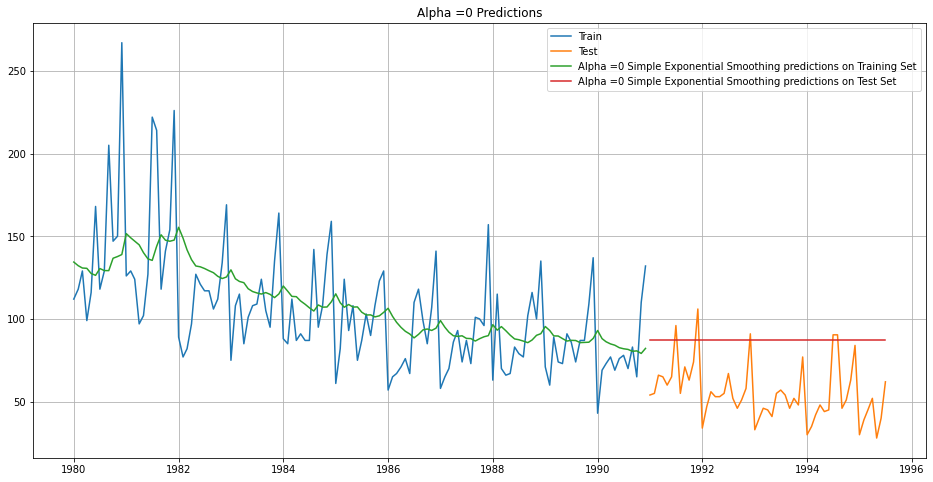

In [74]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0 Predictions');

In [75]:
rmse,mape=calc_metrics(SES_test['Sales'],SES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['SES Alpha=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime          30.718135      21.22
RegressionOnTimeSeasonal  15.726725      21.89
Naive                     78.396083     137.89
SimpleAvg                 52.318735      89.19
Trailing_MA_2             12.298291      14.59
Trailing_MA_3             15.845558      21.55
Trailing_MA_6             15.986163      22.40
Trailing_MA_9             16.500823      23.18
SES Alpha=0               35.936216      59.49

In [76]:
resultsDf_SES = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_SES

Empty DataFrame
Columns: [Alpha Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [77]:
for i in np.arange(0,1,0.1):
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=True,use_brute=True)
    SES_train['Predict',i] = model_SES_alpha_i.fittedvalues
    SES_test['Predict',i] = model_SES_alpha_i.forecast(steps=55)
    
    rmse_SES_train_i = metrics.mean_squared_error(SES_train['Sales'],SES_train['Predict',i],squared=False)
    mape_SES_train_i = MAPE(SES_train['Sales'],SES_train['Predict',i])
    
    rmse_SES_test_i = metrics.mean_squared_error(SES_test['Sales'],SES_test['Predict',i],squared=False)
    mape_SES_test_i = MAPE(SES_test['Sales'],SES_test['Predict',i])
    
    resultsDf_SES = resultsDf_SES.append({'Alpha Values':i,'Train RMSE':rmse_SES_train_i 
                                      ,'Train MAPE': mape_SES_train_i,'Test RMSE':rmse_SES_test_i
                                      ,'Test MAPE':mape_SES_test_i}, ignore_index=True)

In [78]:
resultsDf_SES.sort_values('Test RMSE')

Alpha Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
1           0.1   31.501015       22.71  35.967184      59.54
2           0.2   31.898670       22.24  40.397472      67.14
3           0.3   32.448833       22.31  46.437040      78.30
0           0.0   36.034234       25.39  52.318753      89.19
4           0.4   33.028400       22.51  52.622270      89.75
5           0.5   33.680192       22.69  58.440933     100.73
6           0.6   34.439946       22.89  63.729750     110.65
7           0.7   35.322683       23.09  68.426395     119.42
8           0.8   36.334371       23.42  72.479641     126.95
9           0.9   37.482735       23.93  75.828283     133.15

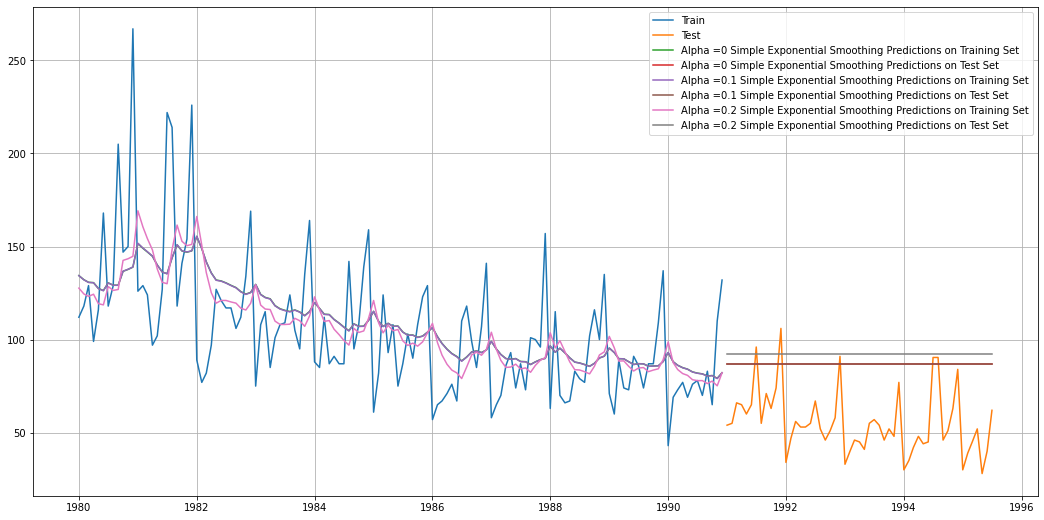

In [79]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing Predictions on Test Set')

plt.plot(SES_train['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing Predictions on Test Set')


plt.legend(loc='best')
plt.grid();

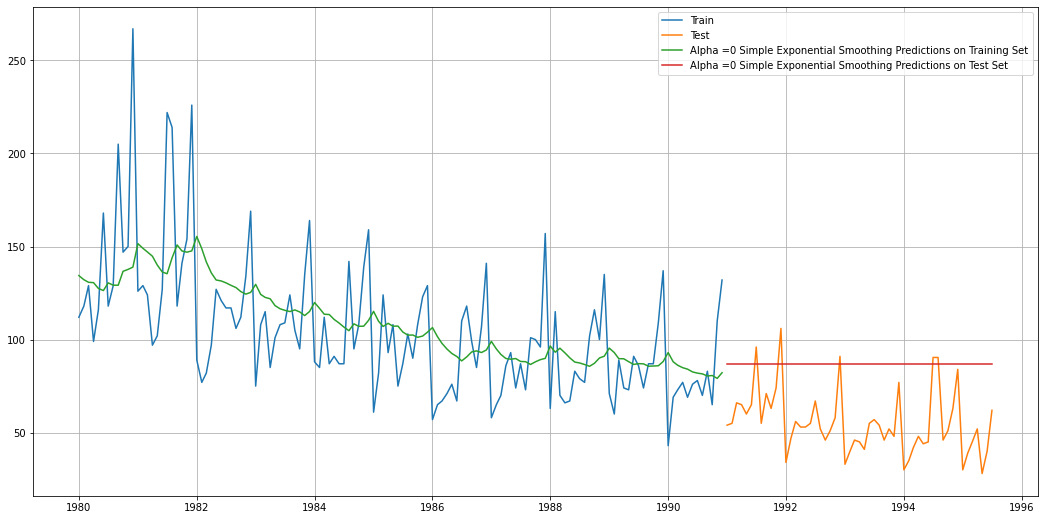

In [80]:
## Plotting on both the Training and Test data

plt.figure(figsize=(18,9))
plt.plot(SES_train['Sales'], label='Train')
plt.plot(SES_test['Sales'], label='Test')

plt.plot(SES_train['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Training Set')
plt.plot(SES_test['Predict'], label='Alpha =0 Simple Exponential Smoothing Predictions on Test Set')

plt.legend(loc='best')
plt.grid();

In [81]:
resultsDf_SES_1 = pd.DataFrame({'Test RMSE': [resultsDf_SES['Test RMSE'][0],resultsDf_SES['Test RMSE'][1]]
                            ,'Test MAPE': [resultsDf_SES['Test MAPE'][0],resultsDf_SES['Test MAPE'][1]]}
                           ,index=['Alpha=0.1,SimpleExponentialSmoothing','Alpha=0.2,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_SES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      30.718135      21.22
RegressionOnTimeSeasonal              15.726725      21.89
Naive                                 78.396083     137.89
SimpleAvg                             52.318735      89.19
Trailing_MA_2                         12.298291      14.59
Trailing_MA_3                         15.845558      21.55
Trailing_MA_6                         15.986163      22.40
Trailing_MA_9                         16.500823      23.18
SES Alpha=0                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing  35.967184      59.54

## Double Exponential Smoothing (Holt's Model, Holt's Linear Trend Method)

In [82]:
DES_train = pd.DataFrame(train.copy())
DES_test = pd.DataFrame(test.copy())

In [83]:
model_DES = Holt(DES_train['Sales'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [84]:
model_DES_auto_fit=model_DES.fit(optimized=True,use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [85]:
model_DES_auto_fit.params

{'damping_slope': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 6.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.15789473684210525,
 'use_boxcox': False}

In [86]:
resultsDf_DES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_DES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [87]:
DES_train['Predict']=model_DES_auto_fit.fittedvalues
DES_test['Predict']=model_DES_auto_fit.forecast(steps=55)

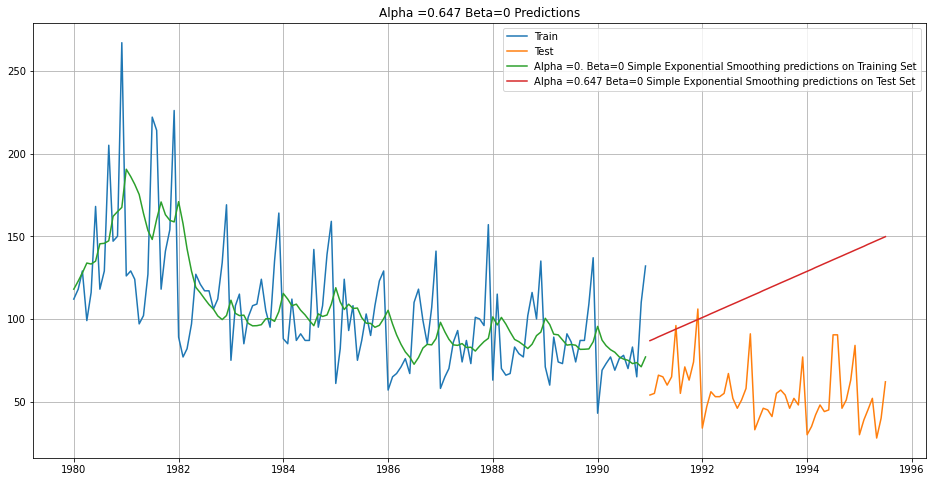

In [88]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['Predict'], label='Alpha =0. Beta=0 Simple Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['Predict'], label='Alpha =0.647 Beta=0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.647 Beta=0 Predictions');

In [89]:
rmse,mape=calc_metrics(DES_test['Sales'],DES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['DES Alpha=0.647,Beta=0'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                      30.718135      21.22
RegressionOnTimeSeasonal              15.726725      21.89
Naive                                 78.396083     137.89
SimpleAvg                             52.318735      89.19
Trailing_MA_2                         12.298291      14.59
Trailing_MA_3                         15.845558      21.55
Trailing_MA_6                         15.986163      22.40
Trailing_MA_9                         16.500823      23.18
SES Alpha=0                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing  35.967184      59.54
DES Alpha=0.647,Beta=0                68.971917     113.77

In [90]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0,1.1,0.1):
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=55)
        
        rmse_DES_train = metrics.mean_squared_error(DES_train['Sales'],DES_train['predict',i,j],squared=False)
        mape_DES_train = MAPE(DES_train['Sales'],DES_train['predict',i,j])
        
        rmse_DES_test = metrics.mean_squared_error(DES_test['Sales'],DES_test['predict',i,j],squared=False)
        mape_DES_test = MAPE(DES_test['Sales'],DES_test['predict',i,j])
        
        resultsDf_DES = resultsDf_DES.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_DES_train
                                      ,'Train MAPE': mape_DES_train,'Test RMSE':rmse_DES_test
                                      ,'Test MAPE':mape_DES_test}, ignore_index=True)

In [91]:
resultsDf_DES

Alpha Values  Beta Values  Train RMSE  Train MAPE    Test RMSE  Test MAPE
0             0.0          0.0  476.514666      389.00  1021.556500    1831.98
1             0.0          0.1  476.514666      389.00  1021.556500    1831.98
2             0.0          0.2  476.514666      389.00  1021.556500    1831.98
3             0.0          0.3  476.514666      389.00  1021.556500    1831.98
4             0.0          0.4  476.514666      389.00  1021.556500    1831.98
..            ...          ...         ...         ...          ...        ...
116           1.0          0.6   51.828562       34.61   799.538675    1281.96
117           1.0          0.7   54.493671       36.36   839.747831    1345.07
118           1.0          0.8   57.362069       38.19   851.819895    1364.01
119           1.0          0.9   60.470112       40.12   832.566741    1333.80
120           1.0          1.0   63.869184       42.41   777.939896    1248.06

[121 rows x 6 columns]

In [92]:
resultsDf_DES.sort_values(by=['Test RMSE']).head(15)

Alpha Values  Beta Values  Train RMSE  Train MAPE  Test RMSE  Test MAPE
11            0.1          0.0   31.501015       22.71  35.967184      59.54
12            0.1          0.1   32.026565       22.78  36.128927      59.41
22            0.2          0.0   31.898670       22.24  40.397472      67.14
33            0.3          0.0   32.448833       22.31  46.437040      78.30
13            0.1          0.2   33.450729       24.45  47.365373      77.70
44            0.4          0.0   33.028400       22.51  52.622270      89.75
55            0.5          0.0   33.680192       22.69  58.440933     100.73
66            0.6          0.0   34.439938       22.89  64.135834     111.38
23            0.2          0.1   32.796403       23.06  64.212073     106.93
77            0.7          0.0   35.322588       23.08  70.089334     122.38
88            0.8          0.0   36.334176       23.40  75.221443     131.82
14            0.1          0.3   33.145789       24.46  76.462652     124.44
99            0.9          0.0   37.482469       23.91  79.474464     139.61
110           1.0          0.0   38.783485       24.72  82.748602     145.60
34            0.3          0.1   33.528397       23.47  96.915102     162.17

Text(0.5, 1.0, 'Comparision of DES Models')

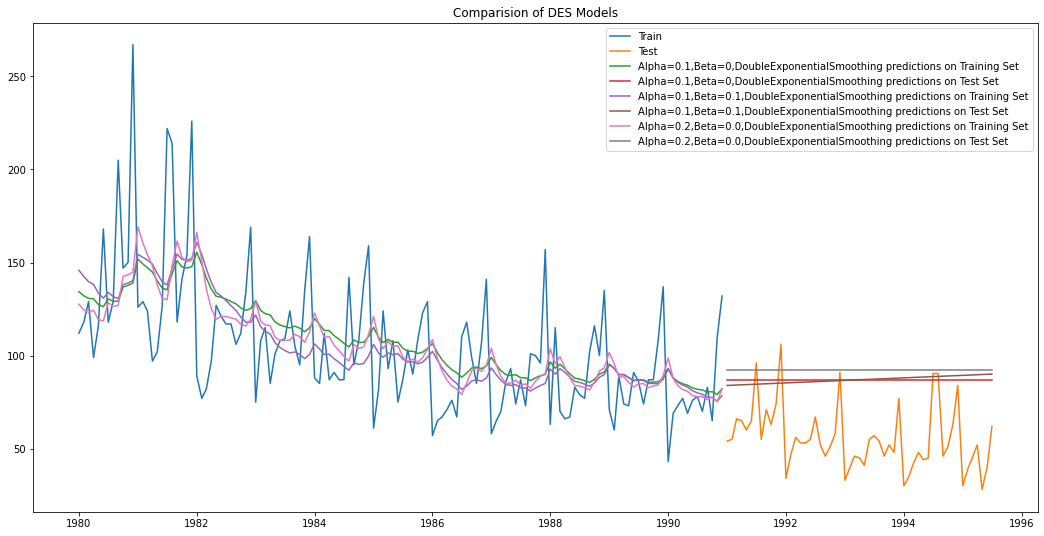

In [93]:
plt.figure(figsize=(18,9))
plt.plot(DES_train['Sales'], label='Train')
plt.plot(DES_test['Sales'], label='Test')

plt.plot(DES_train['predict', 0.1, 0.0], label='Alpha=0.1,Beta=0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0], label='Alpha=0.1,Beta=0,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.1], label='Alpha=0.1,Beta=0.1,DoubleExponentialSmoothing predictions on Test Set')

plt.plot(DES_train['predict', 0.2, 0.0], label='Alpha=0.2,Beta=0.0,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.2, 0.0], label='Alpha=0.2,Beta=0.0,DoubleExponentialSmoothing predictions on Test Set')
plt.legend(loc='best')

plt.title('Comparision of DES Models')

In [94]:
resultsDf_DES_1 = pd.DataFrame({'Test RMSE': [resultsDf_DES['Test RMSE'][0]],'Test MAPE':[resultsDf_DES['Test MAPE'][0]]}
                           ,index=['Alpha=0,Beta=0,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_DES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                             30.718135      21.22
RegressionOnTimeSeasonal                     15.726725      21.89
Naive                                        78.396083     137.89
SimpleAvg                                    52.318735      89.19
Trailing_MA_2                                12.298291      14.59
Trailing_MA_3                                15.845558      21.55
Trailing_MA_6                                15.986163      22.40
Trailing_MA_9                                16.500823      23.18
SES Alpha=0                                  35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing         52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing         35.967184      59.54
DES Alpha=0.647,Beta=0                       68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing  1021.556500    1831.98

## Triple Exponential Smoothing (Holt - Winter's Model)

In [95]:
TES_train = pd.DataFrame(train.copy())
TES_test = pd.DataFrame(test.copy())

In [96]:
TES_train = pd.DataFrame(train.copy())
TES_test = pd.DataFrame(test.copy())

In [97]:
model_TES = ExponentialSmoothing(TES_train['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')
model_TES_autofit = model_TES.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [98]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 76.40262381194242,
 'initial_seasons': array([ 38.68624225,  51.02099115,  58.99256853,  48.32902411,
         57.12003189,  62.54839839,  72.43366307,  78.50129011,
         74.47816209,  72.54576094,  90.61515859, 132.86758386]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.13346990008678222,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.013793634338389796,
 'use_boxcox': False}

In [99]:
TES_train['Predict'] = model_TES_autofit.fittedvalues
TES_train.head()

Sales     Predict
YearMonth                    
1980-01-01  112.0  115.088866
1980-02-01  118.0  127.005658
1980-03-01  129.0  133.752984
1980-04-01   99.0  122.424043
1980-05-01  116.0  128.014505

In [100]:
## Prediction on the test data

TES_test['Predict'] = model_TES_autofit.forecast(steps=55)
TES_test.head()

Sales    Predict
YearMonth                   
1991-01-01   54.0  44.130344
1991-02-01   55.0  56.069626
1991-03-01   66.0  63.645737
1991-04-01   65.0  52.586727
1991-05-01   60.0  60.982268

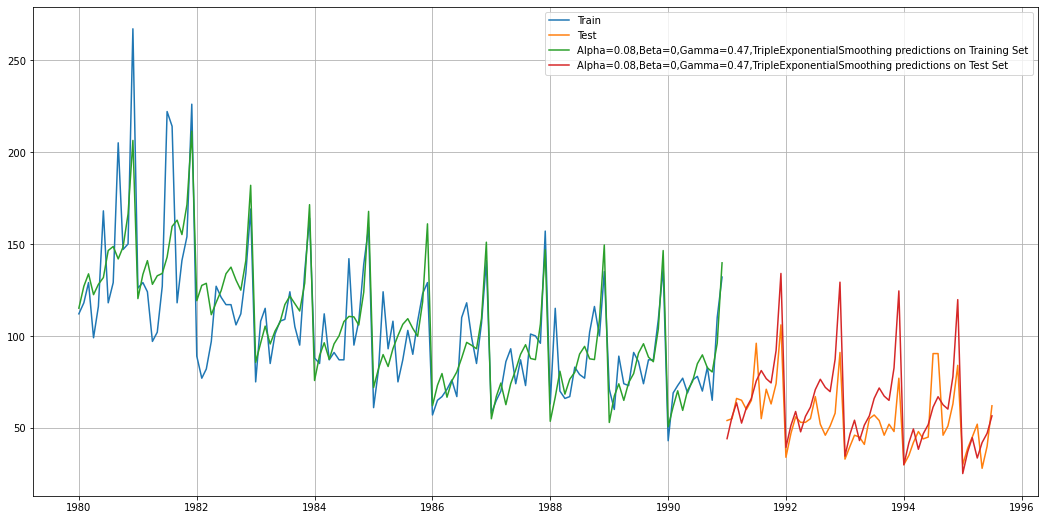

In [101]:
## Plotting on both the Training and Test using autofit

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['Predict'], label='Alpha=0.08,Beta=0,Gamma=0.47,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [102]:
rmse,mape=calc_metrics(TES_test['Sales'],TES_test['Predict'])
tempResultsDf = pd.DataFrame({'Test RMSE': [rmse], 'Test MAPE' : [mape]},index=['Triple Exponential Smoothing Alpha=0.08,Beta=0,Gamma=0.47'])
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                      30.718135      21.22
RegressionOnTimeSeasonal                              15.726725      21.89
Naive                                                 78.396083     137.89
SimpleAvg                                             52.318735      89.19
Trailing_MA_2                                         12.298291      14.59
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
SES Alpha=0                                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
DES Alpha=0.647,Beta=0                                68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71

In [103]:
## First we will define an empty dataframe to store our values from the loop

resultsDf_TES = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_TES

Empty DataFrame
Columns: [Alpha Values, Beta Values, Gamma Values, Train RMSE, Train MAPE, Test RMSE, Test MAPE]
Index: []

In [104]:
for i in np.arange(0,1.1,0.1):
    for j in np.arange(0.0,0.1,0.1):
        for k in np.arange(0,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=55)
        
            rmse_TES_train = metrics.mean_squared_error(TES_train['Sales'],TES_train['predict',i,j,k],squared=False)
            mape_TES_train = MAPE(TES_train['Sales'],TES_train['predict',i,j,k])
        
            rmse_TES_test = metrics.mean_squared_error(TES_test['Sales'],TES_test['predict',i,j,k],squared=False)
            mape_TES_test = MAPE(TES_test['Sales'],TES_test['predict',i,j,k])
        
            resultsDf_TES = resultsDf_TES.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_TES_train
                                      ,'Train MAPE': mape_TES_train,'Test RMSE':rmse_TES_test
                                      ,'Test MAPE':mape_TES_test}, ignore_index=True)

In [105]:
resultsDf_TES

Alpha Values  Beta Values  Gamma Values  ...  Train MAPE   Test RMSE  Test MAPE
0             0.0          0.0           0.0  ...       52.40  119.107075     202.66
1             0.0          0.0           0.1  ...       38.82   76.317384     131.32
2             0.0          0.0           0.2  ...       30.12   55.721100      95.16
3             0.0          0.0           0.3  ...       24.49   45.814610      77.06
4             0.0          0.0           0.4  ...       20.98   40.907143      68.01
..            ...          ...           ...  ...         ...         ...        ...
116           1.0          0.0           0.6  ...       24.20   51.462037      84.41
117           1.0          0.0           0.7  ...       27.10   53.755904      87.44
118           1.0          0.0           0.8  ...       31.28   64.186343     103.91
119           1.0          0.0           0.9  ...       36.91   80.290623     128.53
120           1.0          0.0           1.0  ...       51.52   94.344497     155.56

[121 rows x 7 columns]

In [106]:
resultsDf_TES.sort_values('Test MAPE')

Alpha Values  Beta Values  Gamma Values  ...  Train MAPE   Test RMSE  Test MAPE
100           0.9          0.0           0.1  ...       22.11   23.443219      33.37
111           1.0          0.0           0.1  ...       23.20   23.268309      33.50
89            0.8          0.0           0.1  ...       21.40   23.805214      33.83
78            0.7          0.0           0.1  ...       20.84   24.306421      34.22
67            0.6          0.0           0.1  ...       20.27   24.948145      34.91
..            ...          ...           ...  ...         ...         ...        ...
109           0.9          0.0           1.0  ...       37.68   65.627328     105.34
119           1.0          0.0           0.9  ...       36.91   80.290623     128.53
1             0.0          0.0           0.1  ...       38.82   76.317384     131.32
120           1.0          0.0           1.0  ...       51.52   94.344497     155.56
0             0.0          0.0           0.0  ...       52.40  119.107075     202.66

[121 rows x 7 columns]

In [107]:
resultsDf_TES.sort_values('Test RMSE')

Alpha Values  Beta Values  Gamma Values  ...  Train MAPE   Test RMSE  Test MAPE
111           1.0          0.0           0.1  ...       23.20   23.268309      33.50
100           0.9          0.0           0.1  ...       22.11   23.443219      33.37
89            0.8          0.0           0.1  ...       21.40   23.805214      33.83
78            0.7          0.0           0.1  ...       20.84   24.306421      34.22
67            0.6          0.0           0.1  ...       20.27   24.948145      34.91
..            ...          ...           ...  ...         ...         ...        ...
109           0.9          0.0           1.0  ...       37.68   65.627328     105.34
1             0.0          0.0           0.1  ...       38.82   76.317384     131.32
119           1.0          0.0           0.9  ...       36.91   80.290623     128.53
120           1.0          0.0           1.0  ...       51.52   94.344497     155.56
0             0.0          0.0           0.0  ...       52.40  119.107075     202.66

[121 rows x 7 columns]

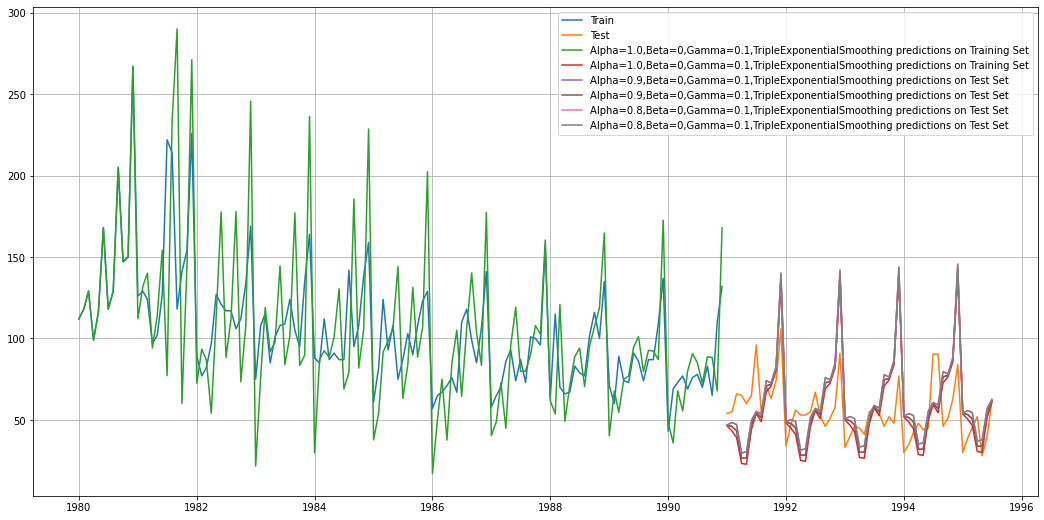

In [108]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 1.0, 0.0, 0.1], label='Alpha=1.0,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 1.0, 0.0, 0.1], label='Alpha=1.0,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Training Set')

plt.plot(TES_test['predict', 0.9, 0.0, 0.1], label='Alpha=0.9,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.9, 0.0, 0.1], label='Alpha=0.9,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')

plt.plot(TES_test['predict', 0.8, 0.0, 0.1], label='Alpha=0.8,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')
plt.plot(TES_test['predict', 0.8, 0.0, 0.1], label='Alpha=0.8,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

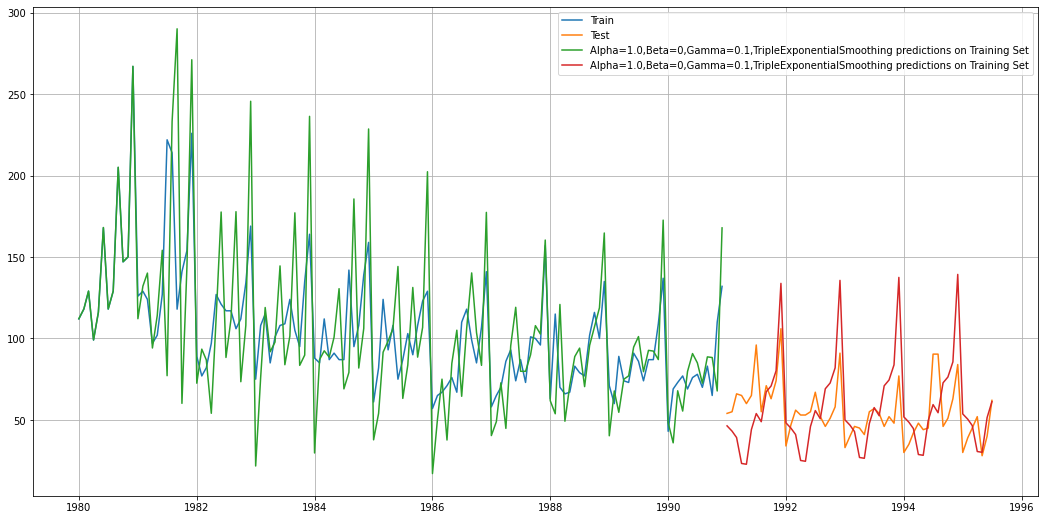

In [109]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

plt.figure(figsize=(18,9))
plt.plot(TES_train['Sales'], label='Train')
plt.plot(TES_test['Sales'], label='Test')

plt.plot(TES_train['predict', 1.0, 0.0, 0.1], label='Alpha=1.0,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Training Set')
plt.plot(TES_test['predict', 1.0, 0.0, 0.1], label='Alpha=1.0,Beta=0,Gamma=0.1,TripleExponentialSmoothing predictions on Training Set')


plt.legend(loc='best')
plt.grid();

In [110]:
resultsDf_TES=resultsDf_TES.sort_values('Test RMSE')
resultsDf_TES

Alpha Values  Beta Values  Gamma Values  ...  Train MAPE   Test RMSE  Test MAPE
111           1.0          0.0           0.1  ...       23.20   23.268309      33.50
100           0.9          0.0           0.1  ...       22.11   23.443219      33.37
89            0.8          0.0           0.1  ...       21.40   23.805214      33.83
78            0.7          0.0           0.1  ...       20.84   24.306421      34.22
67            0.6          0.0           0.1  ...       20.27   24.948145      34.91
..            ...          ...           ...  ...         ...         ...        ...
109           0.9          0.0           1.0  ...       37.68   65.627328     105.34
1             0.0          0.0           0.1  ...       38.82   76.317384     131.32
119           1.0          0.0           0.9  ...       36.91   80.290623     128.53
120           1.0          0.0           1.0  ...       51.52   94.344497     155.56
0             0.0          0.0           0.0  ...       52.40  119.107075     202.66

[121 rows x 7 columns]

In [111]:
resultsDf_TES_1 = pd.DataFrame({'Test RMSE': [resultsDf_TES['Test RMSE'][13],resultsDf_TES['Test RMSE'][2],resultsDf_TES['Test RMSE'][3]],
                                'Test MAPE':[resultsDf_TES['Test MAPE'][13],resultsDf_TES['Test MAPE'][2],resultsDf_TES['Test MAPE'][3]]}
                           ,index=['Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoothing','Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_TES_1])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                      30.718135      21.22
RegressionOnTimeSeasonal                              15.726725      21.89
Naive                                                 78.396083     137.89
SimpleAvg                                             52.318735      89.19
Trailing_MA_2                                         12.298291      14.59
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
SES Alpha=0                                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
DES Alpha=0.647,Beta=0                                68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06

In [112]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Trailing_MA_2                                         12.298291      14.59
RegressionOnTimeSeasonal                              15.726725      21.89
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
RegressionOnTime                                      30.718135      21.22
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
SES Alpha=0                                           35.936216      59.49
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06
SimpleAvg                                             52.318735      89.19
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
DES Alpha=0.647,Beta=0                                68.971917     113.77
Naive                                                 78.396083     137.89
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98

## 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [113]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

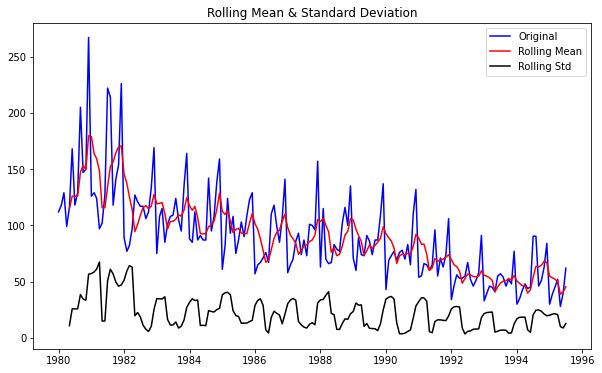

Results of Dickey-Fuller Test:
Test Statistic                  -1.933803
p-value                          0.316330
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [114]:
test_stationarity(rose['Sales'])

In [115]:
## We see that at 5% significant level the Time Series is non-stationary.

## Let us take a difference of order 1 and check whether the Time Series is stationary or not.

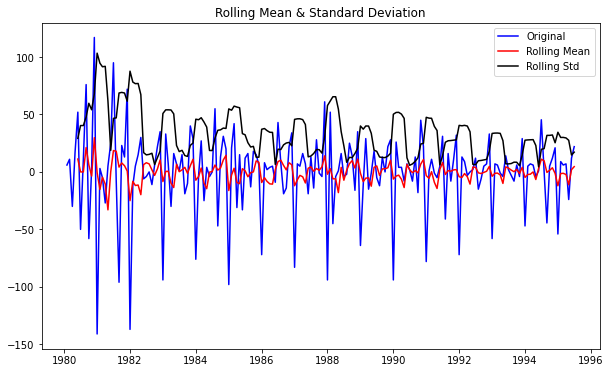

Results of Dickey-Fuller Test:
Test Statistic                -7.855944e+00
p-value                        5.442646e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [116]:
test_stationarity(rose['Sales'].diff().dropna())

In [117]:
#We see that at α= 0.05 the Time Series is indeed stationary.

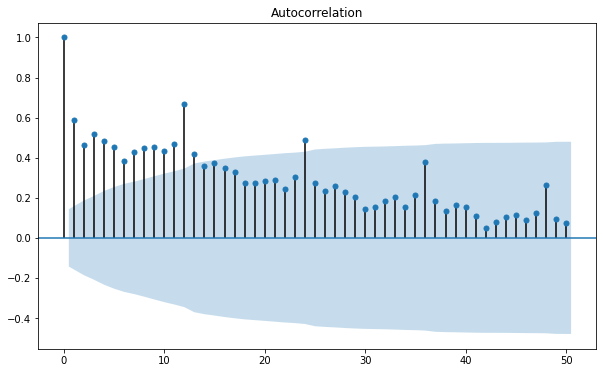

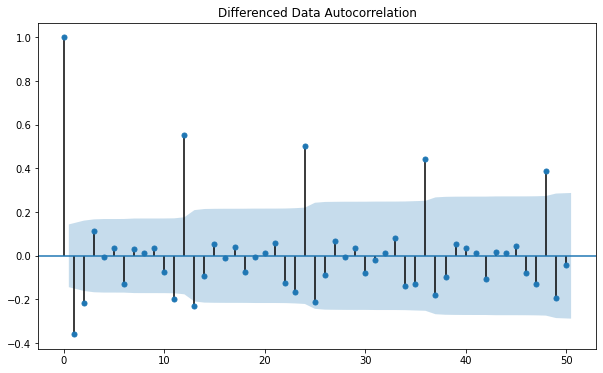

In [118]:
plot_acf(rose['Sales'],lags=50)
plot_acf(rose['Sales'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

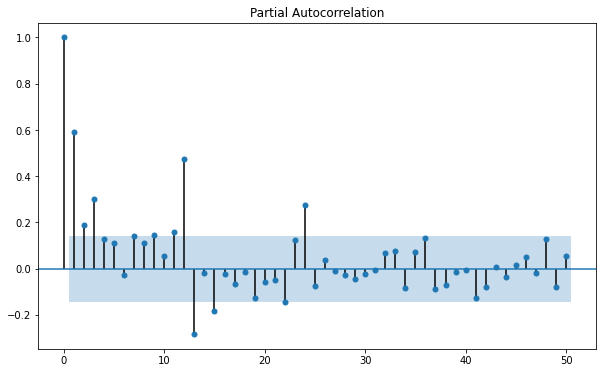

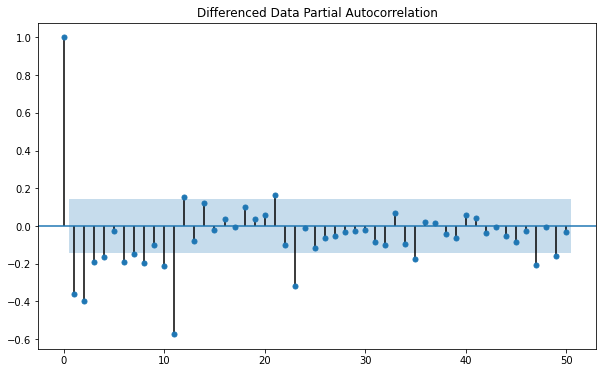

In [119]:
plot_pacf(rose['Sales'],lags=50)
plot_pacf(rose['Sales'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

## 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [120]:
ARIMA_train=rose[rose.index.year<1991]
ARIMA_test=rose[rose.index.year>1990]

In [121]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sales
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0

Last few rows of Training Data


Sales
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0

First few rows of Test Data


Sales
YearMonth        
1991-01-01   54.0
1991-02-01   55.0
1991-03-01   66.0
1991-04-01   65.0
1991-05-01   60.0

Last few rows of Test Data


Sales
YearMonth        
1995-03-01   45.0
1995-04-01   52.0
1995-05-01   28.0
1995-06-01   40.0
1995-07-01   62.0

In [122]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [123]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [124]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(train['Sales'],order=param,freq='MS').fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1335.1526583086775
ARIMA(0, 1, 1) - AIC:1280.726183046564
ARIMA(0, 1, 2) - AIC:1276.8353729386477
ARIMA(1, 1, 0) - AIC:1319.3483105801952
ARIMA(1, 1, 1) - AIC:1277.775748828637
ARIMA(1, 1, 2) - AIC:1277.359225420591
ARIMA(2, 1, 0) - AIC:1300.6092611744152
ARIMA(2, 1, 1) - AIC:1279.0456894093104
ARIMA(2, 1, 2) - AIC:1279.2986939365014


In [125]:
ARIMA_AIC

param          AIC
0  (0, 1, 0)  1335.152658
1  (0, 1, 1)  1280.726183
2  (0, 1, 2)  1276.835373
3  (1, 1, 0)  1319.348311
4  (1, 1, 1)  1277.775749
5  (1, 1, 2)  1277.359225
6  (2, 1, 0)  1300.609261
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694

In [126]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
2  (0, 1, 2)  1276.835373
5  (1, 1, 2)  1277.359225
4  (1, 1, 1)  1277.775749
7  (2, 1, 1)  1279.045689
8  (2, 1, 2)  1279.298694
1  (0, 1, 1)  1280.726183
6  (2, 1, 0)  1300.609261
3  (1, 1, 0)  1319.348311
0  (0, 1, 0)  1335.152658

In [127]:
auto_ARIMA = ARIMA(train['Sales'], order=(0,1,2),freq='MS')
results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -634.418
Method:                       css-mle   S.D. of innovations             30.167
Date:                Sun, 19 Dec 2021   AIC                           1276.835
Time:                        17:57:04   BIC                           1288.336
Sample:                    02-01-1980   HQIC                          1281.509
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4885      0.085     -5.742      0.000      -0.655      -0.322
ma.L1.D.Sales    -0.7601      0.101     -7.499      0.000      -0.959      -0.561
ma.L2.D.Sales    -0.2398      0.095     

In [128]:
pred_ARIMA=results_auto_ARIMA.forecast(steps=len(ARIMA_test))

In [129]:
ARIMA_train['Predicted']=results_auto_ARIMA.fittedvalues
ARIMA_test_result=results_auto_ARIMA.forecast(steps=len(ARIMA_test))
ARIMA_test['Predicted'] = ARIMA_test_result[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [130]:
rmse,mape=calc_metrics(test.Sales,pred_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto ARIMA (2,1,1)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                      30.718135      21.22
RegressionOnTimeSeasonal                              15.726725      21.89
Naive                                                 78.396083     137.89
SimpleAvg                                             52.318735      89.19
Trailing_MA_2                                         12.298291      14.59
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
SES Alpha=0                                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
DES Alpha=0.647,Beta=0                                68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06
Auto ARIMA (2,1,1)                                    17.279705      24.78

In [131]:
SARIMA_train=rose[rose.index.year<1991]
SARIMA_test=rose[rose.index.year>1990]

In [132]:

SARIMA_result_df = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [133]:

SARIMA_result_df_1 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_result_df_1

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [134]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D=range(0,2)
pdq = list(itertools.product(p, d, q))

PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(0, 1, 0, 12)
Model: (1, 1, 1)(0, 1, 1, 12)
Model: (1, 1, 2)(0, 1, 2, 12)
Model: (2, 1, 0)(1, 0, 0, 12)
Model: (2, 1, 1)(1, 0, 1, 12)
Model: (2, 1, 2)(1, 0, 2, 12)


In [ ]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df_1 = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1145.4230827207316
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:965.5057301633203
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:845.8687014776114
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1116.0207869386745
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:969.6913635752697
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:982.326958965881
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:975.3375383601627
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:847.7332182654629
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:962.8794540697565
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:955.573540894588
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:858.5132698374413
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:853.339072914696
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:842.62822

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1054.7434330946817
SARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:918.8573483306409
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:944.2456655531494
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:929.3362488520127
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:792.7161670291482
SARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:915.3332430461678


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:901.2022353927463
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:810.3194350158656
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:804.1555752627663
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:782.1538715164253
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1083.4866975264883
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:913.4938486617702
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1098.6598024278921
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:904.5003488473502
SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:784.0140955703538
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1088.833284341402
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1045.5400933504893
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:904.8310913559274
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:941.525692336279
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:915.2731134090566
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:785.8237144294262
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:913.0105912258001
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:914.170

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:906.7335068866112
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:934.8870392439006
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:917.2527818411417
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:787.7843970223032
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:906.169019675052
SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:907.4597827644948


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:898.6067662973057
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:801.9382052147025


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:791.9171164385019


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:776.9401486468929
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1128.7773704711067
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:958.0793208829955
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1133.2467704396638
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:949.5332566881035
SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:827.1933387102572
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1076.7863198641148
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:951.1988165559268
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:950.2637728228946
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:952.262351888706
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:828.7198705167865
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:924.6004792645356
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:925.9757801384618
SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:927.838069328079
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:814.2969261795347
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:808.510

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:785.8335676749866
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1253.9102116146673
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1085.9643552598202
SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:916.3258311104479
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1099.4823964819777
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:904.700413051385


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:784.1413204826479
SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1073.2912713686883
SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1044.1909353627298
SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:907.6661488808695
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:925.3705668352547
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:915.6932508571616


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:785.9294882922883
SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:897.3464442176773
SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:898.3781889076253
SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:890.6687980882652
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:794.7799442945425
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:783.70365226291


In [ ]:
SARIMA_result_df_1

In [137]:
import statsmodels.api as sm
for param in pdq:
    for param_seasonal in PDQ:
        mod = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
            
        SARIMA_model_result = mod.fit()
        print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, SARIMA_model_result.aic))
        SARIMA_result_df = SARIMA_result_df.append({'param':param,'seasonal':param_seasonal ,'AIC': SARIMA_model_result.aic}, ignore_index=True)
        

SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1145.4230827207316
SARIMA(0, 1, 0)x(0, 0, 2, 12)12 - AIC:976.4375296380891
SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:965.5057301633203
SARIMA(0, 1, 0)x(0, 1, 2, 12)12 - AIC:845.8687014776114
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1116.0207869386745
SARIMA(0, 1, 0)x(1, 0, 2, 12)12 - AIC:969.6913635752697
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:982.326958965881
SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:975.3375383601627
SARIMA(0, 1, 0)x(1, 1, 2, 12)12 - AIC:847.7332182654629
SARIMA(0, 1, 0)x(2, 0, 0, 12)12 - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12)12 - AIC:962.8794540697565
SARIMA(0, 1, 0)x(2, 0, 2, 12)12 - AIC:955.573540894588
SARIMA(0, 1, 0)x(2, 1, 0, 12)12 - AIC:858.5132698374413
SARIMA(0, 1, 0)x(2, 1, 1, 12)12 - AIC:853.339072914696
SARIMA(0, 1, 0)x(2, 1, 2, 12)12 - AIC:842.62822

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1054.7434330946817
SARIMA(0, 1, 1)x(1, 0, 2, 12)12 - AIC:918.8573483306409
SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:944.2456655531494
SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:929.3362488520127
SARIMA(0, 1, 1)x(1, 1, 2, 12)12 - AIC:792.7161670291482
SARIMA(0, 1, 1)x(2, 0, 0, 12)12 - AIC:914.5982866535943
SARIMA(0, 1, 1)x(2, 0, 1, 12)12 - AIC:915.3332430461678


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 1)x(2, 0, 2, 12)12 - AIC:901.2022353927463
SARIMA(0, 1, 1)x(2, 1, 0, 12)12 - AIC:810.3194350158656
SARIMA(0, 1, 1)x(2, 1, 1, 12)12 - AIC:804.1555752627663
SARIMA(0, 1, 1)x(2, 1, 2, 12)12 - AIC:782.1538715164253
SARIMA(0, 1, 2)x(0, 0, 0, 12)12 - AIC:1251.6675430541045
SARIMA(0, 1, 2)x(0, 0, 1, 12)12 - AIC:1083.4866975264883
SARIMA(0, 1, 2)x(0, 0, 2, 12)12 - AIC:913.4938486617702
SARIMA(0, 1, 2)x(0, 1, 0, 12)12 - AIC:1098.6598024278921
SARIMA(0, 1, 2)x(0, 1, 1, 12)12 - AIC:904.5003488473502
SARIMA(0, 1, 2)x(0, 1, 2, 12)12 - AIC:784.0140955703538
SARIMA(0, 1, 2)x(1, 0, 0, 12)12 - AIC:1088.833284341402
SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1045.5400933504893
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:904.8310913559274
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:941.525692336279
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:915.2731134090566
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:785.8237144294262
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:913.0105912258001
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:914.170

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 2, 12)12 - AIC:906.7335068866112
SARIMA(1, 1, 2)x(1, 1, 0, 12)12 - AIC:934.8870392439006
SARIMA(1, 1, 2)x(1, 1, 1, 12)12 - AIC:917.2527818411417
SARIMA(1, 1, 2)x(1, 1, 2, 12)12 - AIC:787.7843970223032
SARIMA(1, 1, 2)x(2, 0, 0, 12)12 - AIC:906.169019675052
SARIMA(1, 1, 2)x(2, 0, 1, 12)12 - AIC:907.4597827644948


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 2, 12)12 - AIC:898.6067662973057
SARIMA(1, 1, 2)x(2, 1, 0, 12)12 - AIC:801.9382052147025


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 1, 12)12 - AIC:791.9171164385019


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 1, 2, 12)12 - AIC:776.9401486468929
SARIMA(2, 1, 0)x(0, 0, 0, 12)12 - AIC:1280.2537561535767
SARIMA(2, 1, 0)x(0, 0, 1, 12)12 - AIC:1128.7773704711067
SARIMA(2, 1, 0)x(0, 0, 2, 12)12 - AIC:958.0793208829955
SARIMA(2, 1, 0)x(0, 1, 0, 12)12 - AIC:1133.2467704396638
SARIMA(2, 1, 0)x(0, 1, 1, 12)12 - AIC:949.5332566881035
SARIMA(2, 1, 0)x(0, 1, 2, 12)12 - AIC:827.1933387102572
SARIMA(2, 1, 0)x(1, 0, 0, 12)12 - AIC:1099.5086021575926
SARIMA(2, 1, 0)x(1, 0, 1, 12)12 - AIC:1076.7863198641148
SARIMA(2, 1, 0)x(1, 0, 2, 12)12 - AIC:951.1988165559268
SARIMA(2, 1, 0)x(1, 1, 0, 12)12 - AIC:950.2637728228946
SARIMA(2, 1, 0)x(1, 1, 1, 12)12 - AIC:952.262351888706
SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:828.7198705167865
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:924.6004792645356
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:925.9757801384618
SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:927.838069328079
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:814.2969261795347
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:808.510

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 1, 2, 12)12 - AIC:785.8335676749866
SARIMA(2, 1, 2)x(0, 0, 0, 12)12 - AIC:1253.9102116146673
SARIMA(2, 1, 2)x(0, 0, 1, 12)12 - AIC:1085.9643552598202
SARIMA(2, 1, 2)x(0, 0, 2, 12)12 - AIC:916.3258311104479
SARIMA(2, 1, 2)x(0, 1, 0, 12)12 - AIC:1099.4823964819777
SARIMA(2, 1, 2)x(0, 1, 1, 12)12 - AIC:904.700413051385


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(0, 1, 2, 12)12 - AIC:784.1413204826479
SARIMA(2, 1, 2)x(1, 0, 0, 12)12 - AIC:1073.2912713686883
SARIMA(2, 1, 2)x(1, 0, 1, 12)12 - AIC:1044.1909353627298
SARIMA(2, 1, 2)x(1, 0, 2, 12)12 - AIC:907.6661488808695
SARIMA(2, 1, 2)x(1, 1, 0, 12)12 - AIC:925.3705668352547
SARIMA(2, 1, 2)x(1, 1, 1, 12)12 - AIC:915.6932508571616


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(1, 1, 2, 12)12 - AIC:785.9294882922883
SARIMA(2, 1, 2)x(2, 0, 0, 12)12 - AIC:897.3464442176773
SARIMA(2, 1, 2)x(2, 0, 1, 12)12 - AIC:898.3781889076253
SARIMA(2, 1, 2)x(2, 0, 2, 12)12 - AIC:890.6687980882652
SARIMA(2, 1, 2)x(2, 1, 0, 12)12 - AIC:794.7799442945425
SARIMA(2, 1, 2)x(2, 1, 1, 12)12 - AIC:783.70365226291


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 1, 2, 12)12 - AIC:778.3285447533873


In [138]:
SARIMA_result_df.sort_values("AIC")

param       seasonal          AIC
53   (0, 1, 2)  (2, 1, 2, 12)   774.969120
107  (1, 1, 2)  (2, 1, 2, 12)   776.940149
161  (2, 1, 2)  (2, 1, 2, 12)   778.328545
35   (0, 1, 1)  (2, 1, 2, 12)   782.153872
160  (2, 1, 2)  (2, 1, 1, 12)   783.703652
..         ...            ...          ...
126  (2, 1, 1)  (0, 0, 0, 12)  1263.231523
18   (0, 1, 1)  (0, 0, 0, 12)  1263.536910
108  (2, 1, 0)  (0, 0, 0, 12)  1280.253756
54   (1, 1, 0)  (0, 0, 0, 12)  1308.161871
0    (0, 1, 0)  (0, 0, 0, 12)  1323.965788

[162 rows x 3 columns]

In [139]:
#(1,1,2)(0,1,2,12
auto_SARIMA=sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                            order=(1,1,2),
                                            seasonal_order=(0,1,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,freq='MS')
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -386.992
Date:                            Sun, 19 Dec 2021   AIC                            785.983
Time:                                    18:02:29   BIC                            801.114
Sample:                                01-01-1980   HQIC                           792.090
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1049      1.659      0.063      0.950      -3.147       3.356
ma.L1         -0.9315      1.689   

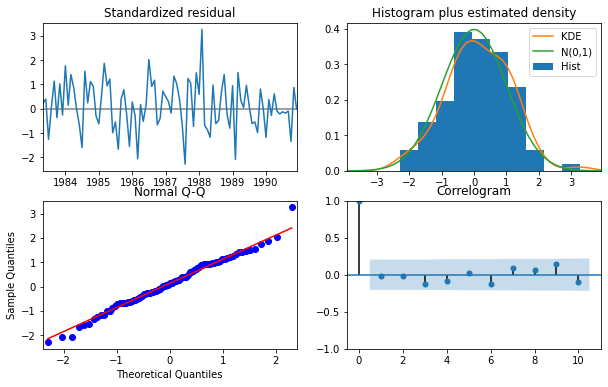

In [140]:
results_auto_SARIMA.plot_diagnostics()
plt.show()

In [141]:
predicted_auto_SARIMA = results_auto_SARIMA.forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_train = results_auto_SARIMA.fittedvalues

In [142]:
predicted_auto_SARIMA_summaryframe=results_auto_SARIMA.get_forecast(steps=len(SARIMA_test))
predicted_auto_SARIMA_summaryframe.summary_frame(alpha=0.05).head()

Sales            mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-01  43.775958  16.146900      12.128615      75.423301
1991-02-01  64.275975  16.387718      32.156639      96.395311
1991-03-01  67.870081  16.492496      35.545383     100.194778
1991-04-01  67.401041  16.585860      34.893352      99.908730
1991-05-01  63.646642  16.677611      30.959125      96.334158

In [143]:
rmse,mape=calc_metrics(SARIMA_test.Sales,predicted_auto_SARIMA)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Auto SARIMA (1,1,2)(0,1,2,12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                      30.718135      21.22
RegressionOnTimeSeasonal                              15.726725      21.89
Naive                                                 78.396083     137.89
SimpleAvg                                             52.318735      89.19
Trailing_MA_2                                         12.298291      14.59
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
SES Alpha=0                                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
DES Alpha=0.647,Beta=0                                68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06
Auto ARIMA (2,1,1)                                    17.279705      24.78
Auto SARIMA (1,1,2)(0,1,2,12)                         17.246871      24.56

In [144]:
resultsDf.sort_values('Test RMSE')

Test RMSE  Test MAPE
Trailing_MA_2                                         12.298291      14.59
RegressionOnTimeSeasonal                              15.726725      21.89
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
Auto SARIMA (1,1,2)(0,1,2,12)                         17.246871      24.56
Auto ARIMA (2,1,1)                                    17.279705      24.78
RegressionOnTime                                      30.718135      21.22
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
SES Alpha=0                                           35.936216      59.49
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06
SimpleAvg                                             52.318735      89.19
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
DES Alpha=0.647,Beta=0                                68.971917     113.77
Naive                                                 78.396083     137.89
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98

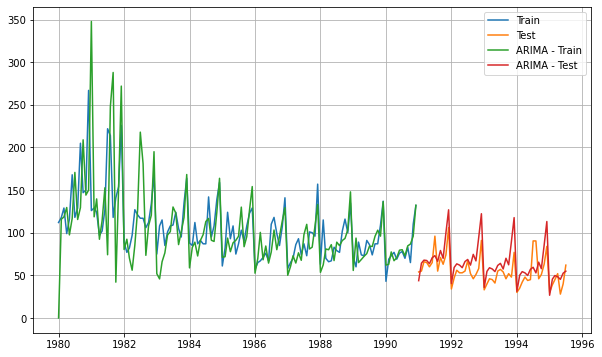

In [145]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_auto_SARIMA_train,label='ARIMA - Train')
plt.plot(SARIMA_test.index,predicted_auto_SARIMA,label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

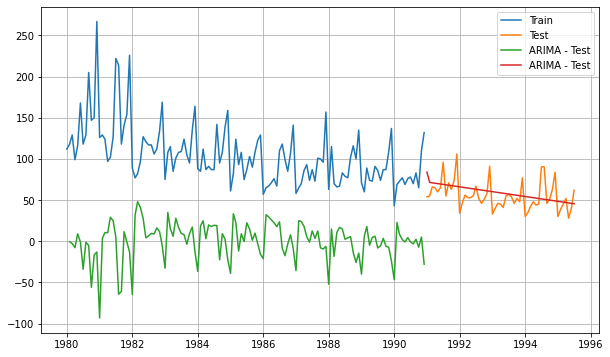

In [146]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(ARIMA_train.index,ARIMA_train['Predicted'],label='ARIMA - Test')
plt.plot(ARIMA_test.index,ARIMA_test_result[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

## 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

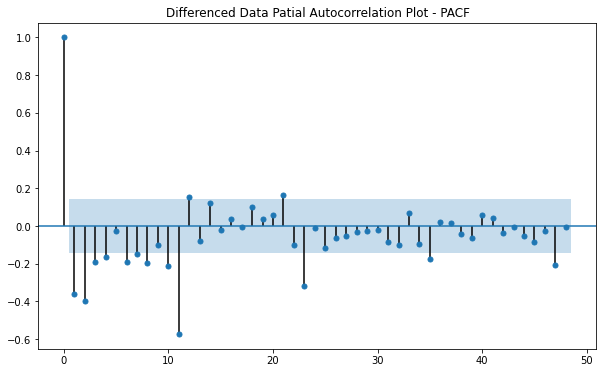

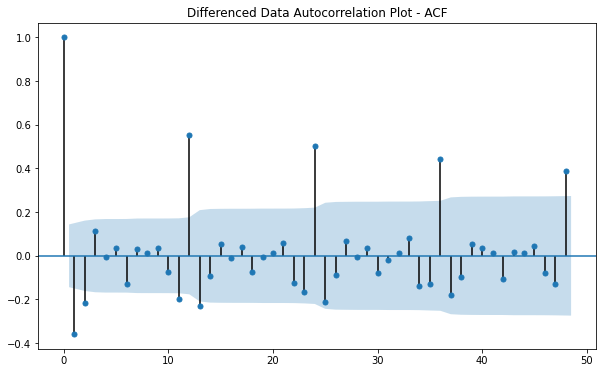

In [147]:
plot_pacf(rose.Sales.diff().dropna(),lags=48,title='Differenced Data Patial Autocorrelation Plot - PACF');
plot_acf(rose.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF');

plt.show()

We have choosen alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the lag at which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the lag at which the ACF plot cuts-off to 0.

By looking at the above plots, we can say that both the PACF and ACF plot cuts-off at 6 and 3 respectively.

Here we see p=5.But as a rule of thumb p shouldn't be greater then 2. Thus we are taking p=2 and from ACF plot q=2.

In [148]:
ARIMA_train

Sales  Predicted
YearMonth                   
1980-01-01  112.0        NaN
1980-02-01  118.0  -0.488541
1980-03-01  129.0  -2.781225
1980-04-01   99.0  -7.820363
1980-05-01  116.0   9.014869
...           ...        ...
1990-08-01   70.0  -3.191860
1990-09-01   83.0   2.470640
1990-10-01   65.0  -7.266998
1990-11-01  110.0   5.082153
1990-12-01  132.0 -27.974343

[132 rows x 2 columns]

In [149]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(3,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -633.485
Method:                       css-mle   S.D. of innovations             29.950
Date:                Sun, 19 Dec 2021   AIC                           1280.969
Time:                        18:02:32   BIC                           1301.096
Sample:                    02-01-1980   HQIC                          1289.148
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4883      0.085     -5.723      0.000      -0.656      -0.321
ar.L1.D.Sales    -0.3558      0.332     -1.071      0.286      -1.007       0.296
ar.L2.D.Sales     0.0279      0.120     

In [150]:
manual_ARIMA = ARIMA(ARIMA_train['Sales'], order=(2,1,2),freq='MS')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -633.649
Method:                       css-mle   S.D. of innovations             29.975
Date:                Sun, 19 Dec 2021   AIC                           1279.299
Time:                        18:02:32   BIC                           1296.550
Sample:                    02-01-1980   HQIC                          1286.309
                         - 12-01-1990                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.4911      0.081     -6.076      0.000      -0.649      -0.333
ar.L1.D.Sales    -0.4383      0.218     -2.015      0.046      -0.865      -0.012
ar.L2.D.Sales     0.0269      0.109     

In [151]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(ARIMA_test))

In [152]:
predicted_manual_ARIMA_train=results_manual_ARIMA.fittedvalues

In [153]:
predicted_manual_ARIMA

(array([79.42153034, 69.46571841, 71.72348222, 69.77312496, 69.99558663,
        69.15252794, 68.83492094, 68.25835307, 67.80941889, 67.29757856,
        66.81674248, 66.32062548, 65.83203991, 65.33974237, 64.84927433,
        64.35790459, 63.86697926, 63.3758349 , 62.8847985 , 62.39370888,
        61.9026455 , 61.41156918, 60.92049924, 60.42942615, 59.93835462,
        59.44728232, 58.9562104 , 58.46513829, 57.97406627, 57.48299421,
        56.99192217, 56.50085012, 56.00977808, 55.51870603, 55.02763399,
        54.53656194, 54.04548989, 53.55441785, 53.0633458 , 52.57227375,
        52.08120171, 51.59012966, 51.09905761, 50.60798557, 50.11691352,
        49.62584147, 49.13476943, 48.64369738, 48.15262533, 47.66155329,
        47.17048124, 46.67940919, 46.18833715, 45.6972651 , 45.20619305]),
 array([29.97485692, 30.75808034, 30.83791595, 30.85962791, 30.86483493,
        30.86610146, 30.86640904, 30.86648377, 30.86650192, 30.86650633,
        30.8665074 , 30.86650766, 30.86650772, 30

In [154]:
predicted_manual_ARIMA_train

YearMonth
1980-02-01    -0.491072
1980-03-01    -2.697624
1980-04-01    -8.304263
1980-05-01     8.845040
1980-06-01     1.107950
                ...    
1990-08-01    -4.890989
1990-09-01     3.244627
1990-10-01    -7.703718
1990-11-01     4.410945
1990-12-01   -27.221595
Length: 131, dtype: float64

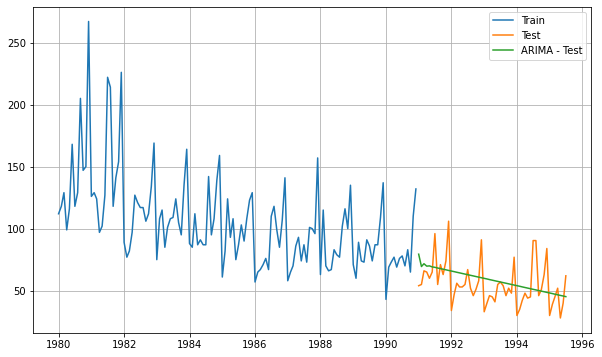

In [155]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

#plt.plot(ARIMA_train.index,predicted_manual_ARIMA_train,label='ARIMA - Train')
plt.plot(ARIMA_test.index,predicted_manual_ARIMA[0],label='ARIMA - Test')
plt.legend(loc='best')
plt.grid();

In [156]:
rmse = metrics.mean_squared_error(ARIMA_test['Sales'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

17.075734813560548


In [157]:
rmse,mape=calc_metrics(ARIMA_test.Sales,predicted_manual_ARIMA[0])
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual ARIMA (2, 1, 2) '])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

Test RMSE  Test MAPE
RegressionOnTime                                      30.718135      21.22
RegressionOnTimeSeasonal                              15.726725      21.89
Naive                                                 78.396083     137.89
SimpleAvg                                             52.318735      89.19
Trailing_MA_2                                         12.298291      14.59
Trailing_MA_3                                         15.845558      21.55
Trailing_MA_6                                         15.986163      22.40
Trailing_MA_9                                         16.500823      23.18
SES Alpha=0                                           35.936216      59.49
Alpha=0.1,SimpleExponentialSmoothing                  52.318753      89.19
Alpha=0.2,SimpleExponentialSmoothing                  35.967184      59.54
DES Alpha=0.647,Beta=0                                68.971917     113.77
Alpha=0,Beta=0,DoubleExponentialSmoothing           1021.556500    1831.98
Triple Exponential Smoothing Alpha=0.08,Beta=0,...    16.823716      22.71
Alpha=0.1,Beta=0,Gamma=0.2,TripleExponentialSmo...    32.389857      51.25
Alpha=0,Beta=0,Gamma=0.2,TripleExponentialSmoot...    55.721100      95.16
Alpha=0,Beta=0,Gamma=0.3,TripleExponentialSmoot...    45.814610      77.06
Auto ARIMA (2,1,1)                                    17.279705      24.78
Auto SARIMA (1,1,2)(0,1,2,12)                         17.246871      24.56
Manual ARIMA (2, 1, 2)                                17.075735      24.34

## SARIMA - Manual

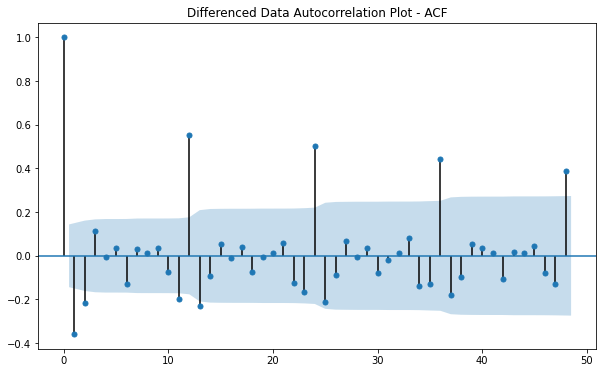

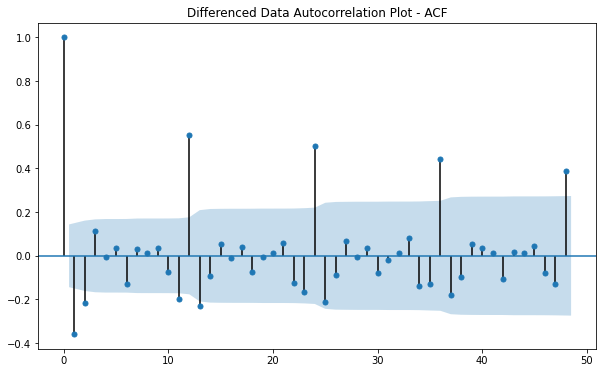

In [158]:
plot_acf(rose.Sales.diff().dropna(),lags=48,title='Differenced Data Autocorrelation Plot - ACF')


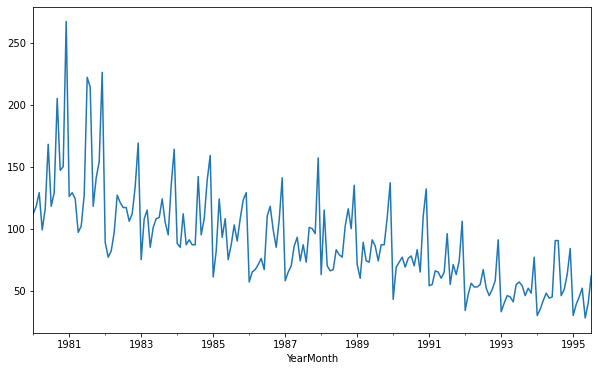

In [159]:
(rose.Sales).plot()

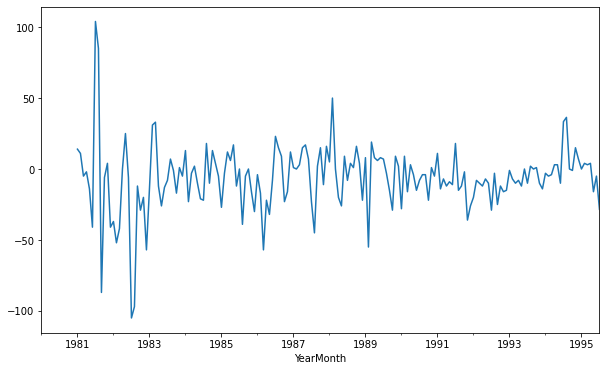

In [160]:
(rose.Sales.diff(12)).plot()

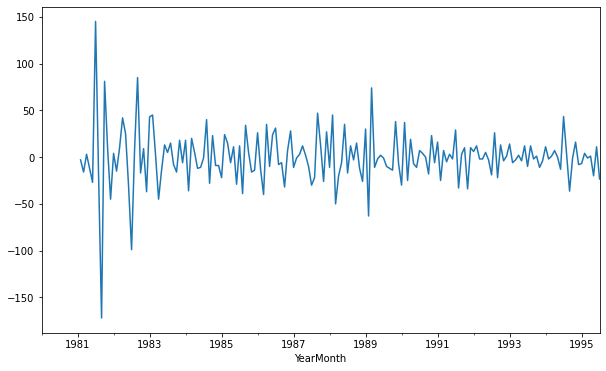

In [161]:
(rose.Sales.diff(12).diff()).plot()

In [162]:
dftest = adfuller(rose['Sales'].diff(12).diff().dropna())
dftest
print('DF test statistic is %3.3f' %dftest[0])

print('DF test p-value is %1.4f' %dftest[1])

DF test statistic is -4.418
DF test p-value is 0.0003


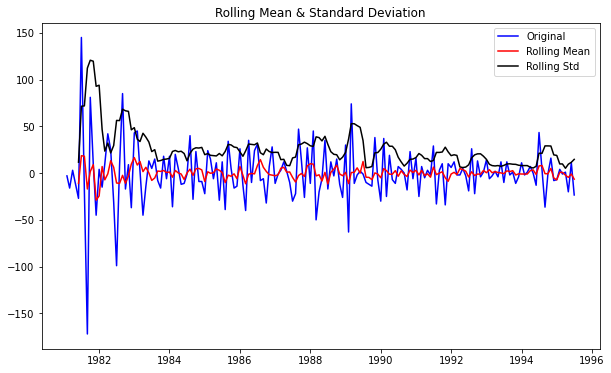

Results of Dickey-Fuller Test:
Test Statistic                  -4.417551
p-value                          0.000276
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [163]:
test_stationarity(rose['Sales'].diff(12).diff().dropna())

In [164]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

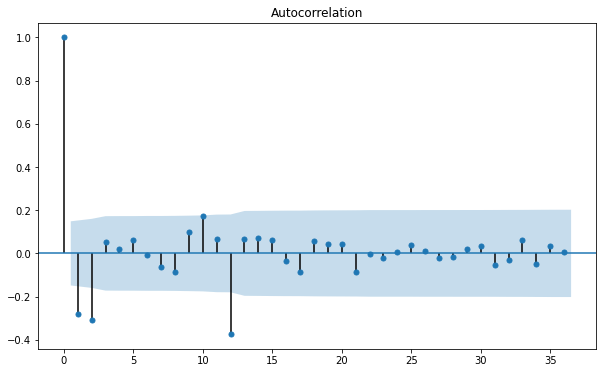

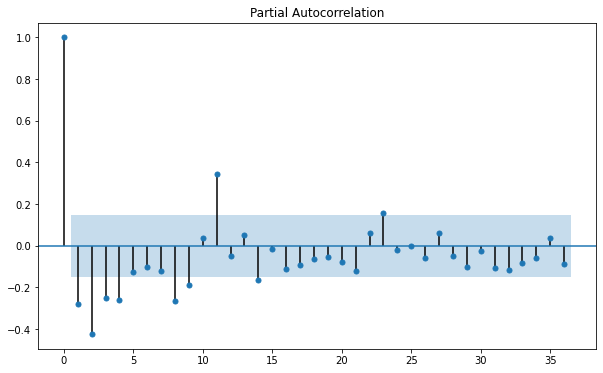

In [165]:
plot_acf((rose['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36)
plot_pacf((rose['Sales'].diff(12).dropna()).diff(1).dropna(),lags=36);

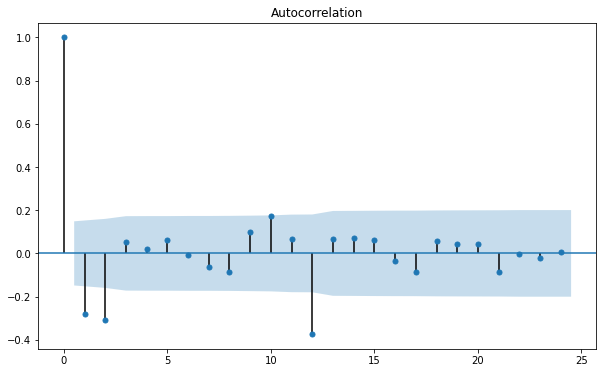

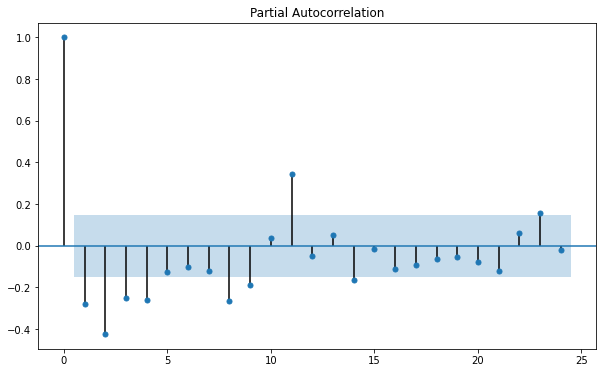

In [166]:
plot_acf((rose['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24)
plot_pacf((rose['Sales'].diff(12).dropna()).diff(1).dropna(),lags=24);

In [167]:
manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(SARIMA_train['Sales'],
                                order=(2, 1, 2),
                                seasonal_order=(2, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Sales   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(2, 1, 1, 12)   Log Likelihood                -383.852
Date:                            Sun, 19 Dec 2021   AIC                            783.704
Time:                                    18:02:40   BIC                            803.964
Sample:                                01-01-1980   HQIC                           791.884
                                     - 12-01-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8728      0.147     -5.947      0.000      -1.160      -0.585
ar.L2         -0.0096      0.119   

In [ ]:
results_manual_SARIMA_12.plot_diagnostics()

In [ ]:
final_hat_avg =test.copy()
pred_SARIMA_train = results_manual_SARIMA_12.get_forecast(steps=len(train))
pred_SARIMA_test = results_manual_SARIMA_12.get_forecast(steps=len(test))
pred_SARIMA_test.predicted_mean

In [ ]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [ ]:
predicted_manual_SARIMA_12_train=results_manual_SARIMA_12.fittedvalues
predicted_manual_SARIMA_12_train

In [ ]:
predicted_manual_SARIMA_12.predicted_mean

In [ ]:
plt.plot(train,label='Train')
plt.plot(test,label='Test')

plt.plot(SARIMA_train.index,predicted_manual_SARIMA_12_train,label='Manual SARIMA Prediction- Train')
plt.plot(SARIMA_test.index,predicted_manual_SARIMA_12.predicted_mean,label='Manual SARIMA Prediction- Test')
plt.legend(loc='best')
plt.grid();

In [ ]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

In [ ]:
rmse,mape=calc_metrics(SARIMA_test.Sales,predicted_manual_SARIMA_12.predicted_mean)
tempDf = pd.DataFrame({'Test RMSE': [rmse],
                                'Test MAPE':[mape]}
                           ,index=['Manual SARIMA (2, 1, 2)(2, 1, 1, 12)'])

resultsDf = pd.concat([resultsDf, tempDf])
resultsDf

## 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [ ]:
resultsDf.sort_values('Test RMSE')

## 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
trailing_MovingAverage_train=test['Sales'].rolling(2).mean(steps=12)
trailing_MovingAverage_train

In [ ]:
best_model = ExponentialSmoothing(rose['Sales'],seasonal_periods = 12 ,trend='additive',seasonal='additive')

In [ ]:
best_model_fit = best_model.fit(smoothing_level=0.1,smoothing_slope=0,smoothing_seasonal=0.2)

In [ ]:
predict_12months= best_model_fit.forecast(steps=12)
predict_12months.head(12)

In [ ]:
best_model_fit.summary()

In [ ]:
resid_std=best_model_fit.resid.std()

In [ ]:
best_model_fit.resid.mean()

In [ ]:
predict_12months

In [ ]:
a=predict_12months+1.96*resid_std
b=predict_12months-1.96*resid_std

In [ ]:
sales=pd.DataFrame()
sales['Predicted']=predict_12months
sales['CI_Lower']=a
sales['CI_Upper']=b

In [ ]:
sales

In [ ]:
plt.figure(figsize=(18,10))
axis = rose['Sales'].plot(label='Observed')
predict_12months.plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(sales.index, sales['CI_Lower'], 
                  sales['CI_Upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('RetailSales')
plt.legend(loc='best')
plt.show()

In [ ]:
y_hat_sma = rose.copy()
train_len = len(train)
ma_window = 2
y_hat_sma['sma_forecast'] = rose['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

In [ ]:
plt.figure(figsize=(20,5))
plt.grid()
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [ ]:
y_hat_sma['sma_forecast']